In [433]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler

In [434]:
pd.set_option('display.max_columns' , 45)

In [435]:
connection = sqlite3.connect('database.sqlite')
cursor = connection.cursor()
cursor.execute("Select name from sqlite_master where type ='table' ;")
tables = cursor.fetchall()
tables

[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

In [436]:
query ='Select * from sqlite_sequence ;'
table_sequence=pd.read_sql_query(query , connection)
table_sequence

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


# Exploration des tables et le choix des tables et variables 

In [437]:
query_1='Select * from Player_Attributes ; '
table_player_attr=pd.read_sql_query(query_1 , connection)
table_player_attr

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [438]:
query_2="""select * from Player; """
table_player=pd.read_sql_query(query_2 , connection)
table_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [439]:
table_player_sp=table_player[['player_api_id' , 'player_name' , 'birthday' , 'height' , 'weight']]
table_player_merge=pd.merge(table_player_attr , table_player_sp , on ='player_api_id' , how='left')
table_player_merge

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,...,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,...,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,...,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,...,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,...,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,...,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,...,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,...,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,...,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,...,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176


In [440]:
table_player_sp=table_player_merge[['player_api_id' , 'date' , 'overall_rating' , 'potential' , 'preferred_foot' ,'height' , 'weight' ,'birthday' , 'player_name']]
table_player_sp

,player_api_id,date,overall_rating,potential,preferred_foot,height,weight,birthday,player_name
0,505942,2016-02-18 00:00:00,67.0,71.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
1,505942,2015-11-19 00:00:00,67.0,71.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
2,505942,2015-09-21 00:00:00,62.0,66.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
3,505942,2015-03-20 00:00:00,61.0,65.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
4,505942,2007-02-22 00:00:00,61.0,65.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30 00:00:00,83.0,85.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic
183974,39902,2009-02-22 00:00:00,78.0,80.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic
183975,39902,2008-08-30 00:00:00,77.0,80.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic
183976,39902,2007-08-30 00:00:00,78.0,81.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic


In [441]:
query_3= 'Select * from Match'
table_match=pd.read_sql_query(query_3 , connection)
table_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,...,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [442]:
"""feature in table match : explore some columns :
    'goal',
    'shoton',
    'shotoff',
    'foulcommit',
    'card',
    'cross',
    'corner',
    'possession' """
col=table_match.columns.tolist()
col[77:85]

['goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession']

In [443]:
### column goal 
liste1 = table_match['goal']  ### XML format

In [444]:
import pandas as pd
import xml.etree.ElementTree as ET

def parse_goal_xml(xml_str):
    if xml_str is None:
        return None  
    
    try:
        root = ET.fromstring(xml_str)
    except ET.ParseError:
        return None  
    
    goal_data = {}
    
    goals = root.find('.//goals')
    if goals is not None:
        goal_data['goals'] = goals.text
    shoton = root.find('.//shoton')
    if shoton is not None:
        goal_data['shoton'] = shoton.text
    elapsed = root.find('.//elapsed')
    if elapsed is not None:
        goal_data['elapsed'] = elapsed.text
    player1 = root.find('.//player1')
    if player1 is not None:
        goal_data['player1'] = player1.text
    player2 = root.find('.//player2')
    if player2 is not None:
        goal_data['player2'] = player2.text
    goal_type = root.find('.//goal_type')
    if goal_type is not None:
        goal_data['goal_type'] = goal_type.text
    team = root.find('.//team')
    if team is not None:
        goal_data['team'] = team.text
    
    return goal_data

parsed_data = [parse_goal_xml(xml_str) for xml_str in liste1]

# Filter out None values (failed parses) and create a DataFrame from the results
parsed_data = [item for item in parsed_data if item is not None]

df = pd.DataFrame(parsed_data)

# Print the DataFrame with the match_id column
print(df)


      goals shoton elapsed player1 player2 goal_type   team
0         1      1      22   37799   38807         n  10261
1         1      1       4   26181   39297         n   9825
2         1      1      83   30853   30889         n   8650
3         1      1       4   23139   36394         n   8654
4         1      1      47   26165   23354         n  10252
...     ...    ...     ...     ...     ...       ...    ...
14212   NaN    NaN      41  181211     NaN         o   9931
14213     1      1       4  340790     NaN         n   7896
14214     1      1      35   38601     NaN         n  10179
14215     1      1      19   25843     NaN         n  10192
14216     1      1      58  493418     NaN         n   9824

[14217 rows x 7 columns]


In [445]:
liste3=table_match['shotoff']
parsed_data = [parse_goal_xml(xml_str) for xml_str in liste3]

# Filtrer les None et créer un DataFrame pandas
parsed_data = [item for item in parsed_data if item is not None]

df = pd.DataFrame(parsed_data)

# Afficher le DataFrame
print(df)


      elapsed player1   team
0           4   30373  10260
1           6   23257   8659
2          10   30352   8472
3           7  127857   8528
4           6   26165  10252
...       ...     ...    ...
14212     NaN     NaN    NaN
14213     NaN     NaN    NaN
14214     NaN     NaN    NaN
14215     NaN     NaN    NaN
14216     NaN     NaN    NaN

[14217 rows x 3 columns]


In [446]:
liste4=table_match['foulcommit']
parsed_data = [parse_goal_xml(xml_str ) for xml_str in liste4]

# Filtrer les None et créer un DataFrame pandas
parsed_data = [item for item in parsed_data if item is not None]

df = pd.DataFrame(parsed_data)

# Afficher le DataFrame
print(df)

      elapsed player1 player2   team
0           1   25518   32569  10261
1           2   36832   26181   8659
2          12   39647   38802   8650
3           1   23139   25005   8654
4           5   30357   33963  10252
...       ...     ...     ...    ...
14212     NaN     NaN     NaN    NaN
14213     NaN     NaN     NaN    NaN
14214     NaN     NaN     NaN    NaN
14215     NaN     NaN     NaN    NaN
14216     NaN     NaN     NaN    NaN

[14217 rows x 4 columns]


In [447]:
liste5=table_match['cross']
parsed_data = [parse_goal_xml(xml_str) for xml_str in liste5]

# Filtrer les None et créer un DataFrame pandas
parsed_data = [item for item in parsed_data if item is not None]

df = pd.DataFrame(parsed_data)

# Afficher le DataFrame
print(df)


      elapsed player1   team goal_type
0           7   30829  10260       NaN
1           3   39297   9825       NaN
2           7   24410   8472       NaN
3           4   36394   8654       NaN
4           2   23354  10252       NaN
...       ...     ...    ...       ...
14212     NaN     NaN    NaN       NaN
14213     NaN     NaN    NaN       NaN
14214     NaN     NaN    NaN       NaN
14215     NaN     NaN    NaN       NaN
14216     NaN     NaN    NaN       NaN

[14217 rows x 4 columns]


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14217 entries, 0 to 14216
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   elapsed    8465 non-null   object
 1   player1    8464 non-null   object
 2   team       8465 non-null   object
 3   goal_type  1 non-null      object
dtypes: object(4)
memory usage: 444.4+ KB


In [449]:
table_match_sp = table_match[['id' , 'league_id', 'season' , 'date'  , 'match_api_id' , 'home_team_api_id' , 'away_team_api_id' , 'home_team_goal' , 'away_team_goal' , 'goal' ]]
table_match_sp

,id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal
0,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,None
1,2,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,None
2,3,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,None
3,4,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,None
4,5,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,None
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,None
25975,25976,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,None
25976,25977,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,None
25977,25978,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,None


In [450]:
query_4='''select * from League'''
table_league=pd.read_sql_query(query_4 , connection)
table_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [451]:
table_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 396.0+ bytes


In [452]:
query_5="""select * from Country"""
table_country=pd.read_sql_query(query_5 , connection)
table_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [453]:
table_Lea_Con = pd.merge(table_league , table_country , on='id' , how='left')
table_Lea_Con=table_Lea_Con.drop(['id'] , axis=1)
table_Lea_Con=table_Lea_Con.rename(columns={'name_x' : 'League' , 'name_y' : 'Country'})
table_Lea_Con

,country_id,League,Country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [454]:
query_6='select * from Team'
table_team=pd.read_sql_query(query_6 , connection)
table_team


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [455]:
query_7='''select* from Team_Attributes'''
table_team_att=pd.read_sql_query(query_7 , connection)
table_team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [456]:
table_team=table_team[['team_api_id' , 'team_long_name' , 'team_short_name']]
table_team_sp = pd.merge(table_team_att , table_team , on='team_api_id' , how='left')
table_team_sp=table_team_sp.drop(['team_fifa_api_id'] , axis=1)
table_team_sp

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1454,1455,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1455,1456,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL
1456,1457,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL


### Choix final du table

In [457]:
### table du player
table_player_sp

,player_api_id,date,overall_rating,potential,preferred_foot,height,weight,birthday,player_name
0,505942,2016-02-18 00:00:00,67.0,71.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
1,505942,2015-11-19 00:00:00,67.0,71.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
2,505942,2015-09-21 00:00:00,62.0,66.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
3,505942,2015-03-20 00:00:00,61.0,65.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
4,505942,2007-02-22 00:00:00,61.0,65.0,right,182.88,187,1992-02-29 00:00:00,Aaron Appindangoye
...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30 00:00:00,83.0,85.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic
183974,39902,2009-02-22 00:00:00,78.0,80.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic
183975,39902,2008-08-30 00:00:00,77.0,80.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic
183976,39902,2007-08-30 00:00:00,78.0,81.0,right,180.34,176,1982-06-05 00:00:00,Zvjezdan Misimovic


In [458]:
### table match
table_match_sp

,id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal
0,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,None
1,2,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,None
2,3,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,None
3,4,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,None
4,5,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,None
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,None
25975,25976,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,None
25976,25977,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,None
25977,25978,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,None


In [459]:
## table league
table_Lea_Con

,country_id,League,Country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [460]:
### table team
table_team_sp

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1454,1455,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1455,1456,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL
1456,1457,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL


# Exploration analytics et  nettoyage du table 

### Table player_sp

In [461]:
table_player_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183978 non-null  int64  
 1   date            183978 non-null  object 
 2   overall_rating  183142 non-null  float64
 3   potential       183142 non-null  float64
 4   preferred_foot  183142 non-null  object 
 5   height          183978 non-null  float64
 6   weight          183978 non-null  int64  
 7   birthday        183978 non-null  object 
 8   player_name     183978 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 12.6+ MB


In [462]:
#### Change date type  
table_player_sp['date']=pd.to_datetime(table_player_sp['date'] , errors='raise')
table_player_sp['birthday']=pd.to_datetime(table_player_sp['birthday'] , errors='raise')

/tmp/ipykernel_540535/2781357210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_player_sp['date']=pd.to_datetime(table_player_sp['date'] , errors='raise')
/tmp/ipykernel_540535/2781357210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_player_sp['birthday']=pd.to_datetime(table_player_sp['birthday'] , errors='raise')


In [463]:
table_player_na=table_player_sp[table_player_sp.isna().any(axis=1)]
liste_pl_api=table_player_na['player_api_id'].tolist()

In [464]:
for i in range(len(liste_pl_api)) : 
    table_player_sp['overall_rating']=np.where(
        (table_player_sp['overall_rating'].isna()) & (table_player_sp['player_api_id']==liste_pl_api[i]) , 
          int(table_player_sp['overall_rating'].mean()) , table_player_sp['overall_rating']
    )
    
    table_player_sp['potential']=np.where(
        (table_player_sp['potential'].isna()) & (table_player_sp['player_api_id']==liste_pl_api[i]) , 
        int(table_player_sp['potential'].mean())  , table_player_sp['potential']
    )

    table_player_sp['preferred_foot']=np.where(
        (table_player_sp['preferred_foot'].isna()) & (table_player_sp['player_api_id']==liste_pl_api[i]) , 
        table_player_sp['preferred_foot'].mode() , table_player_sp['preferred_foot']
    )

/tmp/ipykernel_540535/117278898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_player_sp['overall_rating']=np.where(
/tmp/ipykernel_540535/117278898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_player_sp['potential']=np.where(
/tmp/ipykernel_540535/117278898.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [465]:
table_player_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_api_id   183978 non-null  int64         
 1   date            183978 non-null  datetime64[ns]
 2   overall_rating  183978 non-null  float64       
 3   potential       183978 non-null  float64       
 4   preferred_foot  183978 non-null  object        
 5   height          183978 non-null  float64       
 6   weight          183978 non-null  int64         
 7   birthday        183978 non-null  datetime64[ns]
 8   player_name     183978 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 12.6+ MB


### Table match_sp

In [466]:
table_match_sp

,id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal
0,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,None
1,2,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,None
2,3,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,None
3,4,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,None
4,5,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,None
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,None
25975,25976,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,None
25976,25977,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,None
25977,25978,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,None


In [467]:
table_match_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   league_id         25979 non-null  int64 
 2   season            25979 non-null  object
 3   date              25979 non-null  object
 4   match_api_id      25979 non-null  int64 
 5   home_team_api_id  25979 non-null  int64 
 6   away_team_api_id  25979 non-null  int64 
 7   home_team_goal    25979 non-null  int64 
 8   away_team_goal    25979 non-null  int64 
 9   goal              14217 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.0+ MB


In [468]:
liste1 = table_match_sp['goal'].tolist()
match_ids = table_match_sp['match_api_id'].tolist() 

In [469]:
print(liste1[12420])

<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>71</event_incident_typefk><elapsed>43</elapsed><player2>30714</player2><player1>96398</player1><sortorder>0</sortorder><team>8686</team><id>3418604</id><n>22</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>71</event_incident_typefk><elapsed>65</elapsed><player1>37950</player1><sortorder>0</sortorder><team>8686</team><id>3418644</id><n>24</n><type>goal</type><goal_type>n</goal_type></value></goal>


In [470]:
# import pandas as pd
# import xml.etree.ElementTree as ET


# def parse_goal_xml(xml_str, match_id):
#     if xml_str is None:
#         return None  
    
#     try:
#         root = ET.fromstring(xml_str)
#     except ET.ParseError:
#         return None  
    
#     goal_data = {'match_api_id': match_id}
    
#     goals = root.find('.//goals')
#     if goals is not None:
#         goal_data['goals'] = goals.text
#     shoton = root.find('.//shoton')
#     if shoton is not None:
#         goal_data['shoton'] = shoton.text
#     elapsed = root.find('.//elapsed')
#     if elapsed is not None:
#         goal_data['elapsed'] = elapsed.text
#     player1 = root.find('.//player1')
#     if player1 is not None:
#         goal_data['player1'] = player1.text
#     player2 = root.find('.//player2')
#     if player2 is not None:
#         goal_data['player2'] = player2.text
#     goal_type = root.find('.//goal_type')
#     if goal_type is not None:
#         goal_data['goal_type'] = goal_type.text
#     team = root.find('.//team')
#     if team is not None:
#         goal_data['team'] = team.text
    
#     return goal_data


In [471]:
import xml.etree.ElementTree as ET
import pandas as pd

df_goal_non_nan = table_match.dropna(subset='goal')


def parse_goals_to_table(df_goal):
    
    all_goal_data = []

    for i,xml_data in enumerate(df_goal['goal']):
        
        if pd.notnull(xml_data):
            x = df_goal.index[i]
            y= df_goal['season'][x]
                        
            root = ET.fromstring(xml_data)
            
            for value in root.findall('value'):
                goal_info = {
                    'season':y,
                    'match_api_id':x,
                    'goals': value.find('stats/goals').text if value.find('stats/goals') is not None else None,
                    'shoton': value.find('stats/shoton').text if value.find('stats/shoton') is not None else None,
                    'elapsed': value.find('elapsed').text if value.find('elapsed') is not None else None,
                    'player1': value.find('player1').text if value.find('player1') is not None else None,
                    'player2': value.find('player2').text if value.find('player2') is not None else None,
                    'subtype': value.find('subtype').text if value.find('subtype') is not None else None,
                    'team': value.find('team').text if value.find('team') is not None else None,
                    'goal_type': value.find('goal_type').text if value.find('goal_type') is not None else None,
                }
                
                all_goal_data.append(goal_info)

    return pd.DataFrame(all_goal_data)


df_goal= parse_goals_to_table(df_goal_non_nan)

df_goal

,season,match_api_id,goals,shoton,elapsed,player1,player2,subtype,team,goal_type
0,2008/2009,1728,1,1,22,37799,38807,header,10261,n
1,2008/2009,1728,1,1,24,24148,24154,shot,10260,n
2,2008/2009,1729,1,1,4,26181,39297,shot,9825,n
3,2008/2009,1730,1,1,83,30853,30889,distance,8650,n
4,2008/2009,1731,1,1,4,23139,36394,shot,8654,n
...,...,...,...,...,...,...,...,...,...,...
39975,2015/2016,25947,1,1,71,37554,None,None,10192,n
39976,2015/2016,25948,1,1,58,493418,None,None,9824,n
39977,2015/2016,25948,1,1,67,197757,None,None,10243,n
39978,2015/2016,25948,1,1,69,198082,None,None,10243,n


In [472]:
# parsed_data = [parse_goal_xml(xml_str, match_id) for xml_str, match_id in zip(liste1, match_ids)]

# parsed_data = [item for item in parsed_data if item is not None]

# df_goal= pd.DataFrame(parsed_data)

# df_goal

In [473]:
table_match_sp['date']=pd.to_datetime(table_match_sp['date'] , errors='raise')
# table_match_sp=table_match_sp.drop(['goal'] , axis=1)

/tmp/ipykernel_540535/836557659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_match_sp['date']=pd.to_datetime(table_match_sp['date'] , errors='raise')


In [474]:
table_match_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                25979 non-null  int64         
 1   league_id         25979 non-null  int64         
 2   season            25979 non-null  object        
 3   date              25979 non-null  datetime64[ns]
 4   match_api_id      25979 non-null  int64         
 5   home_team_api_id  25979 non-null  int64         
 6   away_team_api_id  25979 non-null  int64         
 7   home_team_goal    25979 non-null  int64         
 8   away_team_goal    25979 non-null  int64         
 9   goal              14217 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.0+ MB


### Table team_sp

In [475]:
table_team_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_api_id                     1458 non-null   int64  
 2   date                            1458 non-null   object 
 3   buildUpPlaySpeed                1458 non-null   int64  
 4   buildUpPlaySpeedClass           1458 non-null   object 
 5   buildUpPlayDribbling            489 non-null    float64
 6   buildUpPlayDribblingClass       1458 non-null   object 
 7   buildUpPlayPassing              1458 non-null   int64  
 8   buildUpPlayPassingClass         1458 non-null   object 
 9   buildUpPlayPositioningClass     1458 non-null   object 
 10  chanceCreationPassing           1458 non-null   int64  
 11  chanceCreationPassingClass      1458 non-null   object 
 12  chanceCreationCrossing          14

In [476]:
table_team_sp['date']=pd.to_datetime(table_team_sp['date']  , errors='raise')

In [477]:
table_team_sp['buildUpPlayDribblingClass'].unique()

array(['Little', 'Normal', 'Lots'], dtype=object)

In [478]:
little_data=table_team_sp[table_team_sp['buildUpPlayDribblingClass']=='Little']
little_data['buildUpPlayDribbling'].describe()

count    35.000000
mean     30.485714
std       2.489642
min      24.000000
25%      29.000000
50%      32.000000
75%      32.000000
max      33.000000
Name: buildUpPlayDribbling, dtype: float64

In [479]:
table_team_sp['buildUpPlayDribbling']=np.where(
    (table_team_sp['buildUpPlayDribbling'].isna()) & (table_team_sp['buildUpPlayDribblingClass']=='Little'),
    np.random.randint(24, 34, size=table_team_sp.shape[0]), 
    table_team_sp['buildUpPlayDribbling']
)

In [480]:
table_team_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_api_id                     1458 non-null   int64         
 2   date                            1458 non-null   datetime64[ns]
 3   buildUpPlaySpeed                1458 non-null   int64         
 4   buildUpPlaySpeedClass           1458 non-null   object        
 5   buildUpPlayDribbling            1458 non-null   float64       
 6   buildUpPlayDribblingClass       1458 non-null   object        
 7   buildUpPlayPassing              1458 non-null   int64         
 8   buildUpPlayPassingClass         1458 non-null   object        
 9   buildUpPlayPositioningClass     1458 non-null   object        
 10  chanceCreationPassing           1458 non-null   int64         
 11  chan

# Analyse descriptive

### Analyse des joueur

In [481]:
table_player_sp

,player_api_id,date,overall_rating,potential,preferred_foot,height,weight,birthday,player_name
0,505942,2016-02-18,67.0,71.0,right,182.88,187,1992-02-29,Aaron Appindangoye
1,505942,2015-11-19,67.0,71.0,right,182.88,187,1992-02-29,Aaron Appindangoye
2,505942,2015-09-21,62.0,66.0,right,182.88,187,1992-02-29,Aaron Appindangoye
3,505942,2015-03-20,61.0,65.0,right,182.88,187,1992-02-29,Aaron Appindangoye
4,505942,2007-02-22,61.0,65.0,right,182.88,187,1992-02-29,Aaron Appindangoye
...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30,83.0,85.0,right,180.34,176,1982-06-05,Zvjezdan Misimovic
183974,39902,2009-02-22,78.0,80.0,right,180.34,176,1982-06-05,Zvjezdan Misimovic
183975,39902,2008-08-30,77.0,80.0,right,180.34,176,1982-06-05,Zvjezdan Misimovic
183976,39902,2007-08-30,78.0,81.0,right,180.34,176,1982-06-05,Zvjezdan Misimovic


In [482]:
overall_rating_per_s = table_player_sp.groupby(['player_name' , table_player_sp['date'].dt.year])['overall_rating'].mean().reset_index()
overall_rating_per_s = overall_rating_per_s.sort_values(by=['overall_rating' , 'date'] , ascending=[False , True])
overall_rating_per_s

,player_name,date,overall_rating
40182,Lionel Messi,2012,94.000000
40183,Lionel Messi,2013,94.000000
40185,Lionel Messi,2015,93.428571
40184,Lionel Messi,2014,93.333333
13027,Cristiano Ronaldo,2015,92.600000
...,...,...,...
51416,Nick Blackman,2007,36.000000
29928,James Vincent,2007,35.000000
51646,Nicola Madonna,2007,35.000000
29929,James Vincent,2008,35.000000


In [483]:
top_rating_player=overall_rating_per_s.sort_values(by='overall_rating'  , ascending=False).drop_duplicates(subset='player_name').head(10)

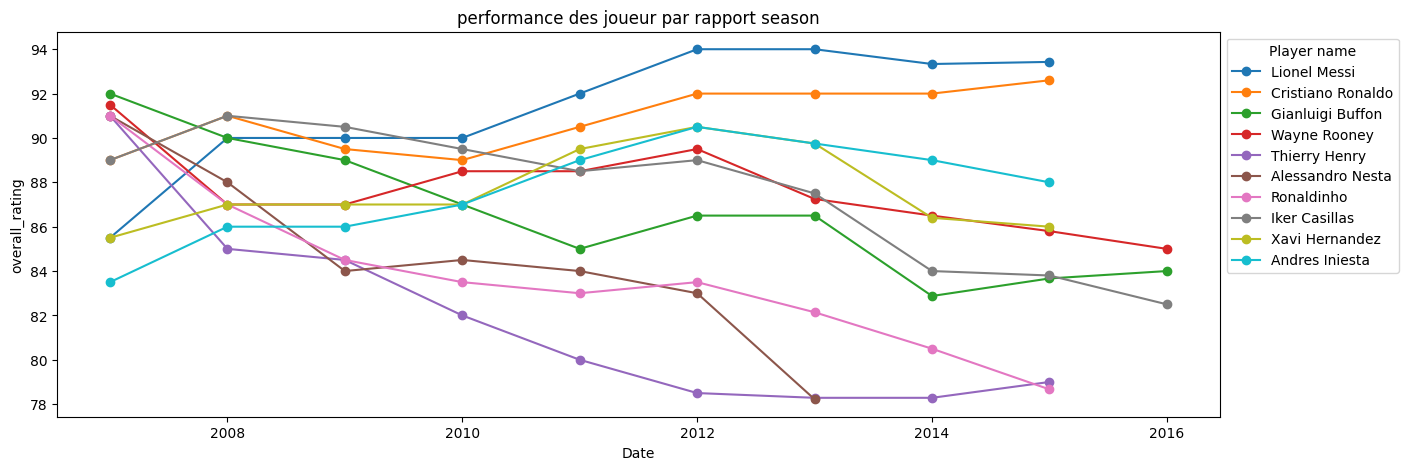

In [484]:
plt.figure(figsize=(15,5))

for player in top_rating_player['player_name']:
    player_data=overall_rating_per_s[overall_rating_per_s['player_name']==player].sort_values(by='date' , ascending = True)
    plt.plot(player_data['date'] , player_data['overall_rating'] , label=player , marker='o')

plt.title('performance des joueur par rapport season')
plt.xlabel('Date')
plt.ylabel('overall_rating')
plt.legend(title='Player name' , bbox_to_anchor=(1,1))
plt.show()

In [485]:
potential_per_s = table_player_sp.groupby(['player_name' , table_player_sp['date'].dt.year])['potential'].mean().reset_index()
potential_per_s = potential_per_s.sort_values(by=['potential' , 'date'] , ascending=[False , True])
potential_per_s

,player_name,date,potential
40183,Lionel Messi,2013,97.000000
40182,Lionel Messi,2012,96.000000
40184,Lionel Messi,2014,95.666667
40178,Lionel Messi,2008,95.000000
40179,Lionel Messi,2009,95.000000
...,...,...,...
70955,Yannis Salibur,2007,44.000000
70956,Yannis Salibur,2008,44.000000
25813,Graham Carey,2007,42.000000
25814,Graham Carey,2009,42.000000


In [486]:
top_pot_player = potential_per_s.sort_values(by='potential'  , ascending=False).drop_duplicates(subset='player_name').head(10)
top_pot_player

,player_name,date,potential
40183,Lionel Messi,2013,97.0
13025,Cristiano Ronaldo,2013,94.6
51360,Neymar,2016,94.0
59894,Ronaldinho,2007,94.0
4821,Andres Iniesta,2012,93.0
3142,Alexandre Pato,2007,93.0
4537,Andrea Pirlo,2008,93.0
15898,David Villa,2008,93.0
29898,James Rodriguez,2016,93.0
24916,Gianluigi Buffon,2008,93.0


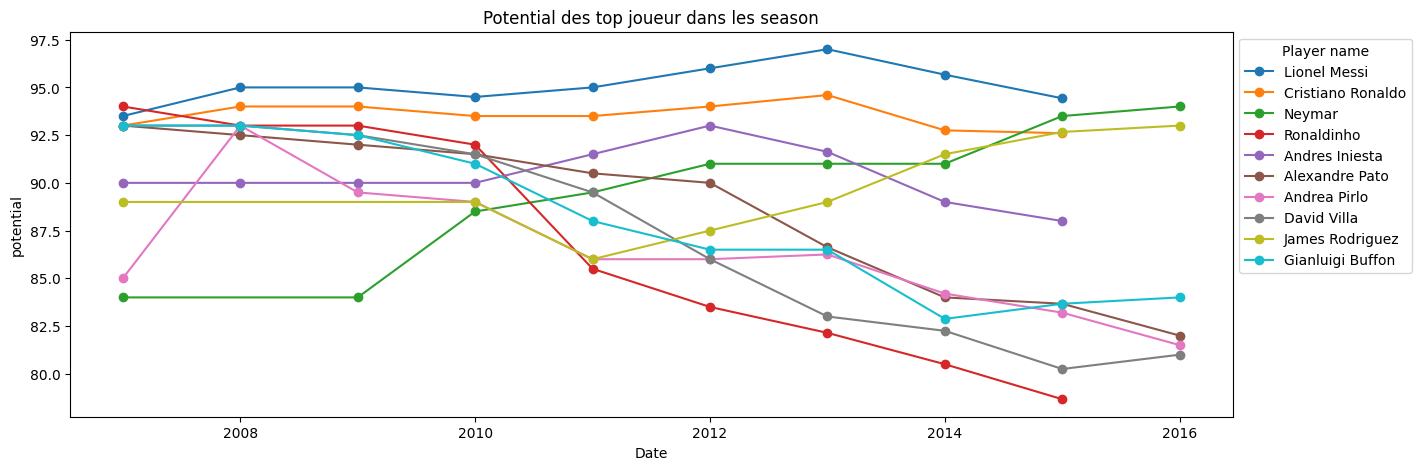

In [487]:
plt.figure(figsize=(15 , 5))

for player in top_pot_player['player_name'] : 
    player_data = potential_per_s[potential_per_s['player_name']==player].sort_values(by='date' , ascending=True)
    plt.plot(player_data['date'] , player_data['potential'] , marker='o' , label=player)

plt.title('Potential des top joueur dans les season')
plt.xlabel('Date')
plt.ylabel('potential')
plt.legend(title='Player name' , bbox_to_anchor=(1,1))
plt.show()


In [488]:
table_player_sp[table_player_sp['player_name']=='Kieran MacDonald']

,player_api_id,date,overall_rating,potential,preferred_foot,height,weight,birthday,player_name
96756,400133,2015-03-06,60.0,69.0,right,180.34,165,1993-07-21,Kieran MacDonald
96757,400133,2015-01-09,60.0,69.0,right,180.34,165,1993-07-21,Kieran MacDonald
96758,400133,2015-01-02,60.0,69.0,right,180.34,165,1993-07-21,Kieran MacDonald
96759,400133,2011-08-30,60.0,69.0,right,180.34,165,1993-07-21,Kieran MacDonald
96760,400133,2007-02-22,60.0,69.0,right,180.34,165,1993-07-21,Kieran MacDonald


In [489]:
overall_rating_per_day=table_player_sp.groupby(['player_name' , table_player_sp['date']])['overall_rating'].value_counts().reset_index()
overall_rating_per_day

,player_name,date,overall_rating,count
0,Aaron Appindangoye,2007-02-22,61.0,1
1,Aaron Appindangoye,2015-03-20,61.0,1
2,Aaron Appindangoye,2015-09-21,62.0,1
3,Aaron Appindangoye,2015-11-19,67.0,1
4,Aaron Appindangoye,2016-02-18,67.0,1
...,...,...,...,...
183868,de Oliveira Cleber Monteiro,2012-02-22,62.0,1
183869,dos Santos Fabio Junior,2007-02-22,64.0,1
183870,dos Santos Fabio Junior,2010-02-22,64.0,1
183871,dos Santos Fabio Junior,2010-08-30,69.0,1


In [490]:
player_cons=overall_rating_per_day.groupby('player_name')['overall_rating'].agg(['std' , 'mean' , 'count']).reset_index()
player_cons.rename(columns={'std' : 'std_dev' , 'mean' : 'avg_rating' , 'count' : 'match_played'} , inplace=True)
player_cons=player_cons.sort_values(by='std_dev' , ascending=True)

In [491]:
most_player_cons = player_cons.sort_values(by=['match_played','std_dev'] ,  ascending=[False , True])
most_player_cons

,player_name,std_dev,avg_rating,match_played
2168,Danilo,5.812772,73.660377,106
396,Alex,6.878871,73.067961,103
2726,Douglas,3.822912,71.101124,89
3210,Felipe,3.740853,72.511628,86
8705,Ricardo,5.326314,70.100000,80
...,...,...,...,...
7288,Michel Antunes Lugo,0.000000,58.000000,2
8154,Pascal Cerrone,0.000000,60.000000,2
461,Alexandre Azevedo,0.000000,58.000000,2
9746,Stephane Garcia,0.000000,57.000000,2


In [492]:
top_player_con=most_player_cons.head(15)

/tmp/ipykernel_540535/287387531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='player_name', y='std_dev', data=top_player_con, palette='viridis')


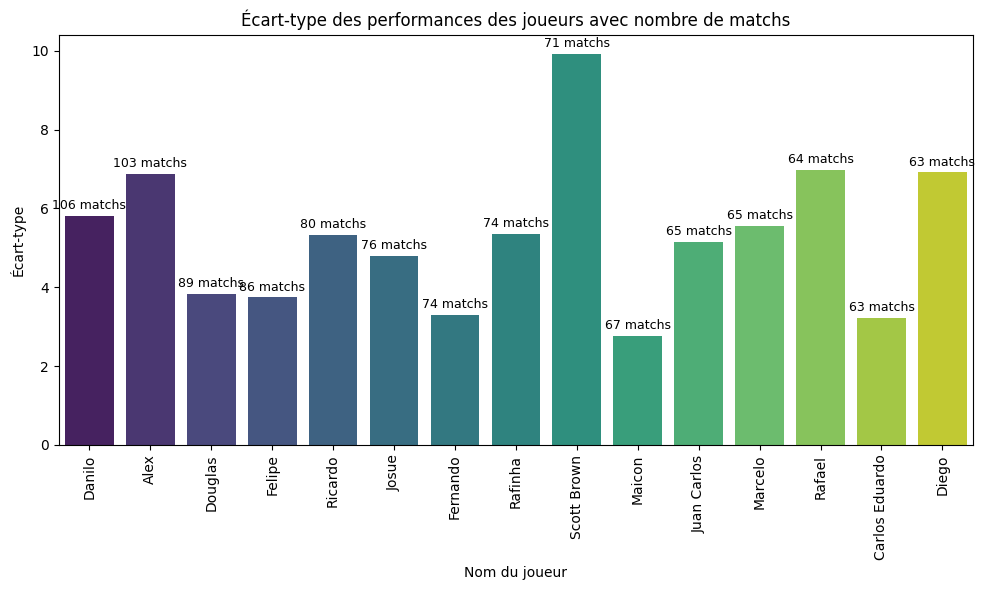

In [493]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='player_name', y='std_dev', data=top_player_con, palette='viridis')

for i, row in enumerate(top_player_con.itertuples()):
    ax.annotate(f"{row.match_played} matchs",
                xy=(i, row.std_dev), 
                xytext=(0, 5),  
                textcoords='offset points',
                ha='center', fontsize=9, color='black')

plt.xticks(rotation=90)

plt.title('Écart-type des performances des joueurs avec nombre de matchs')
plt.xlabel('Nom du joueur')
plt.ylabel('Écart-type')

plt.tight_layout()

plt.show()


In [494]:
import statsmodels.api as sm

# Define the independent (X) and dependent (y) variables
X = most_player_cons['match_played']
y = most_player_cons['std_dev']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                std_dev   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     1744.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:57:24   Log-Likelihood:                -21771.
No. Observations:               10848   AIC:                         4.355e+04
Df Residuals:                   10846   BIC:                         4.356e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7795      0.034     51.866   

##### interpretation
##### match_played: 0.0730 (p-value = 0.000) The coefficient for match_played is 0.0730, and the p-value is also 0.000, indicating that match_played is a statistically significant predictor of std_dev. This suggests that for every additional match played, the standard deviation of the player’s performance increases by approximately 0.073 units.

In [495]:
df_goal

,season,match_api_id,goals,shoton,elapsed,player1,player2,subtype,team,goal_type
0,2008/2009,1728,1,1,22,37799,38807,header,10261,n
1,2008/2009,1728,1,1,24,24148,24154,shot,10260,n
2,2008/2009,1729,1,1,4,26181,39297,shot,9825,n
3,2008/2009,1730,1,1,83,30853,30889,distance,8650,n
4,2008/2009,1731,1,1,4,23139,36394,shot,8654,n
...,...,...,...,...,...,...,...,...,...,...
39975,2015/2016,25947,1,1,71,37554,None,None,10192,n
39976,2015/2016,25948,1,1,58,493418,None,None,9824,n
39977,2015/2016,25948,1,1,67,197757,None,None,10243,n
39978,2015/2016,25948,1,1,69,198082,None,None,10243,n


In [496]:
df_goal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39980 entries, 0 to 39979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        39980 non-null  object
 1   match_api_id  39980 non-null  int64 
 2   goals         35229 non-null  object
 3   shoton        34548 non-null  object
 4   elapsed       39980 non-null  object
 5   player1       39863 non-null  object
 6   player2       17069 non-null  object
 7   subtype       21551 non-null  object
 8   team          39946 non-null  object
 9   goal_type     39946 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


In [497]:
df_goal['goals']=pd.to_numeric(df_goal['goals'] , errors='coerce')
df_goal['goals'].fillna(1, inplace=True)

/tmp/ipykernel_540535/455906334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goal['goals'].fillna(1, inplace=True)


In [498]:
df_goal=df_goal.dropna(subset=('player1'))
df_goal['player1']=df_goal['player1'].astype(int)
df_goal['player2'].fillna(0, inplace=True)
df_goal['player2']=df_goal['player2'].astype(int)

/tmp/ipykernel_540535/3885400704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goal['player1']=df_goal['player1'].astype(int)
/tmp/ipykernel_540535/3885400704.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goal['player2'].fillna(0, inplace=True)
/tmp/ipykernel_540535/388

In [499]:
df_goal = df_goal.merge(table_player[['player_api_id', 'player_name']], 
                        left_on='player1', 
                        right_on='player_api_id', 
                        how='left')
df_goal.rename(columns={'player_name': 'player_contribution'}, inplace=True)

df_goal = df_goal.merge(table_player[['player_api_id', 'player_name']], 
                        left_on='player2', 
                        right_on='player_api_id', 
                        how='left')

df_goal.rename(columns={'player_name': 'player_ass'}, inplace=True)

df_goal.drop(columns=['player_api_id_x', 'player_api_id_y' , 'player1' , 'player2'], inplace=True)


In [500]:
df_goal['season']=df_goal['season'].apply(lambda x : int(x.split('/')[0]))

In [501]:
most_players_goal = df_goal.groupby(['player_contribution' , 'season'])['goals'].sum().reset_index()
most_players_goal = most_players_goal.sort_values(by=['season','goals'] , ascending=[True , False])

In [502]:
most_players_goal

,player_contribution,season,goals
9006,Samuel Eto'o,2008,33.0
2602,Diego Forlan,2008,32.0
2435,David Villa,2008,30.0
3934,Grafite,2008,28.0
2629,Diego Milito,2008,27.0
...,...,...,...
10520,Youssef El Jebli,2015,1.0
10542,Yuya Osako,2015,1.0
10543,Zakaria Bakkali,2015,1.0
10571,Zinedine Machach,2015,1.0


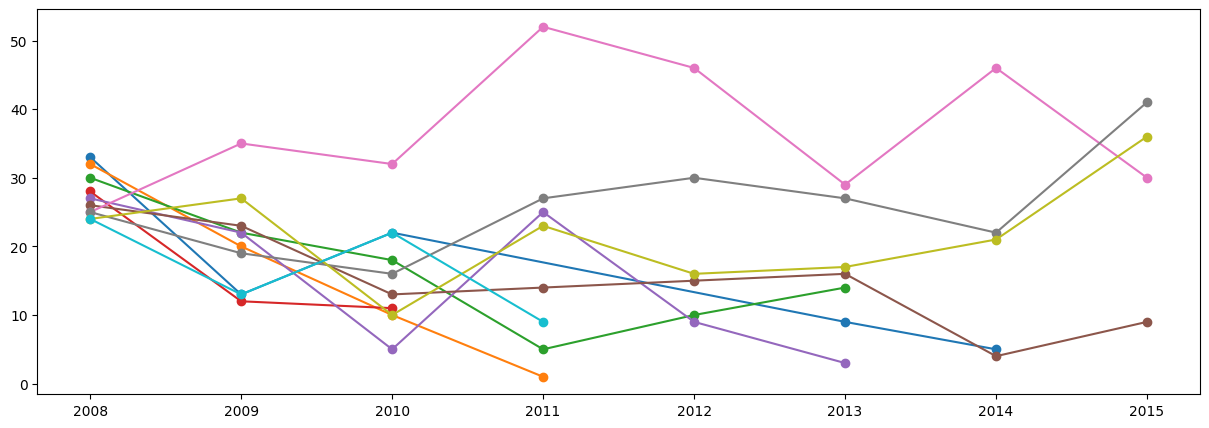

In [503]:
plt.figure(figsize=(15,5))
player_cont=list(most_players_goal['player_contribution'].unique())
for player in player_cont[:10]:
    player_data=most_players_goal[most_players_goal['player_contribution']==player].sort_values(by='season' , ascending=True)
    plt.plot(player_data['season'] , player_data['goals'] , marker='o' , label=player)
plt.show()

In [504]:
table_match_sp=table_match_sp.drop(columns=(['season' , 'id' , 'goal']))
table_match_sp

,league_id,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008-08-17,492473,9987,9993,1,1
1,1,2008-08-16,492474,10000,9994,0,0
2,1,2008-08-16,492475,9984,8635,0,3
3,1,2008-08-17,492476,9991,9998,5,0
4,1,2008-08-16,492477,7947,9985,1,3
...,...,...,...,...,...,...,...
25974,24558,2015-09-22,1992091,10190,10191,1,0
25975,24558,2015-09-23,1992092,9824,10199,1,2
25976,24558,2015-09-23,1992093,9956,10179,2,0
25977,24558,2015-09-22,1992094,7896,10243,0,0


In [505]:
table_match_sp = table_match_sp.merge(table_team[['team_api_id', 'team_long_name']], 
                        left_on='home_team_api_id', 
                        right_on='team_api_id', 
                        how='left')


table_match_sp = table_match_sp.merge(table_team[['team_api_id', 'team_long_name']], 
                        left_on='away_team_api_id', 
                        right_on='team_api_id', 
                        how='left')

table_match_sp.rename(columns={'team_long_name_x': 'home_team'}, inplace=True)

table_match_sp.rename(columns={'team_long_name_y': 'away_team'}, inplace=True)

table_match_sp.drop(columns=['team_api_id_x', 'team_api_id_y' , 'away_team_api_id' , 'home_team_api_id'], inplace=True)


In [506]:
table_match_sp

,league_id,date,match_api_id,home_team_goal,away_team_goal,home_team,away_team
0,1,2008-08-17,492473,1,1,KRC Genk,Beerschot AC
1,1,2008-08-16,492474,0,0,SV Zulte-Waregem,Sporting Lokeren
2,1,2008-08-16,492475,0,3,KSV Cercle Brugge,RSC Anderlecht
3,1,2008-08-17,492476,5,0,KAA Gent,RAEC Mons
4,1,2008-08-16,492477,1,3,FCV Dender EH,Standard de Liège
...,...,...,...,...,...,...,...
25974,24558,2015-09-22,1992091,1,0,FC St. Gallen,FC Thun
25975,24558,2015-09-23,1992092,1,2,FC Vaduz,FC Luzern
25976,24558,2015-09-23,1992093,2,0,Grasshopper Club Zürich,FC Sion
25977,24558,2015-09-22,1992094,0,0,Lugano,FC Zürich


In [507]:
top_team_goal = table_match_sp.groupby('home_team')['home_team_goal'].sum().reset_index()
top_team_rec = table_match_sp.groupby('away_team')['away_team_goal'].sum().reset_index()

In [508]:
top_team_goal=top_team_goal.sort_values(by='home_team_goal' , ascending=False)
top_team_rec=top_team_rec.sort_values(by='away_team_goal' , ascending=False)

Text(0.5, 1.0, "Histogramme des buts à  l'extérieur")

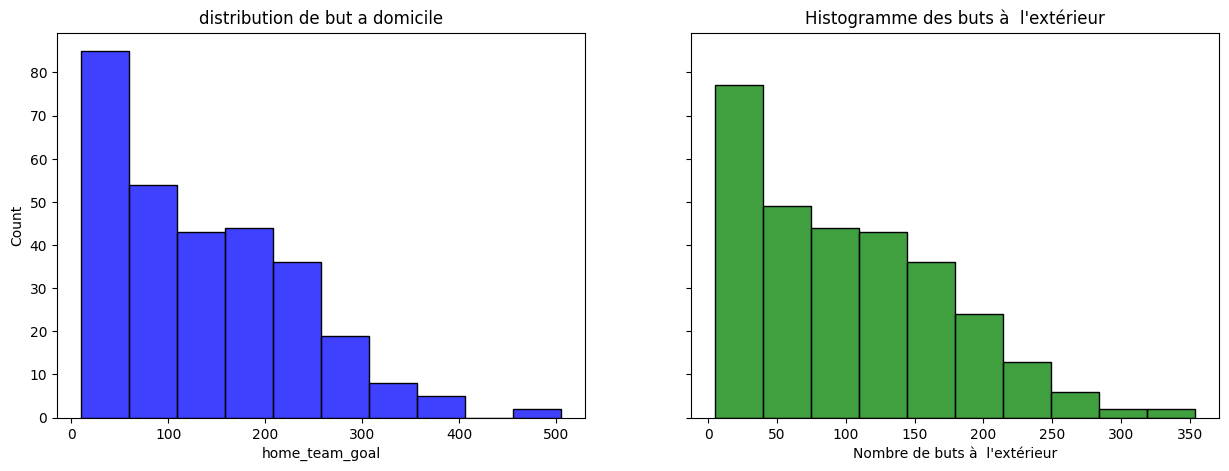

In [509]:
fig , axes = plt.subplots(1 , 2 , figsize=(15,5) , sharey=True)

sns.histplot(top_team_goal['home_team_goal'], ax=axes[0],  bins=10, color='blue', edgecolor='black')
plt.xlabel('Nombre de buts à domicile')
axes[0].set_title('distribution de but a domicile')

sns.histplot(top_team_rec['away_team_goal'], ax=axes[1], bins=10, color='green', edgecolor='black')
plt.xlabel('Nombre de buts à  l\'extérieur')
axes[1].set_title('Histogramme des buts à  l\'extérieur')


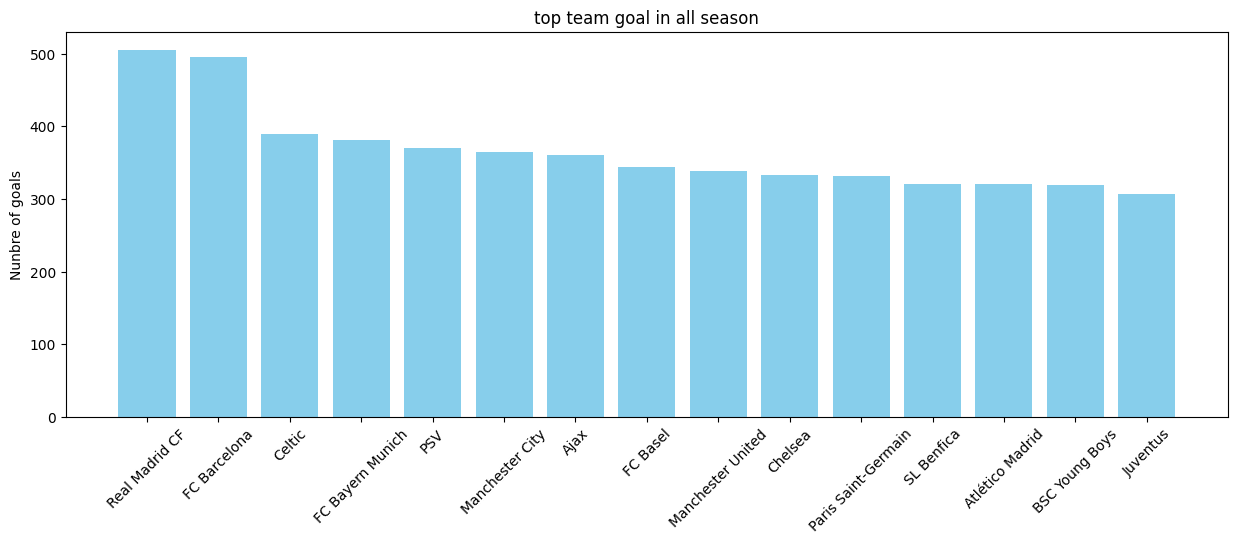

In [510]:
plt.figure(figsize=(15,5))
plt.bar(top_team_goal['home_team'].head(15) , top_team_goal['home_team_goal'].head(15) , color='skyblue')
plt.title('top team goal in all season')
plt.ylabel('Nunbre of goals')
plt.xticks(rotation=45)
plt.show()


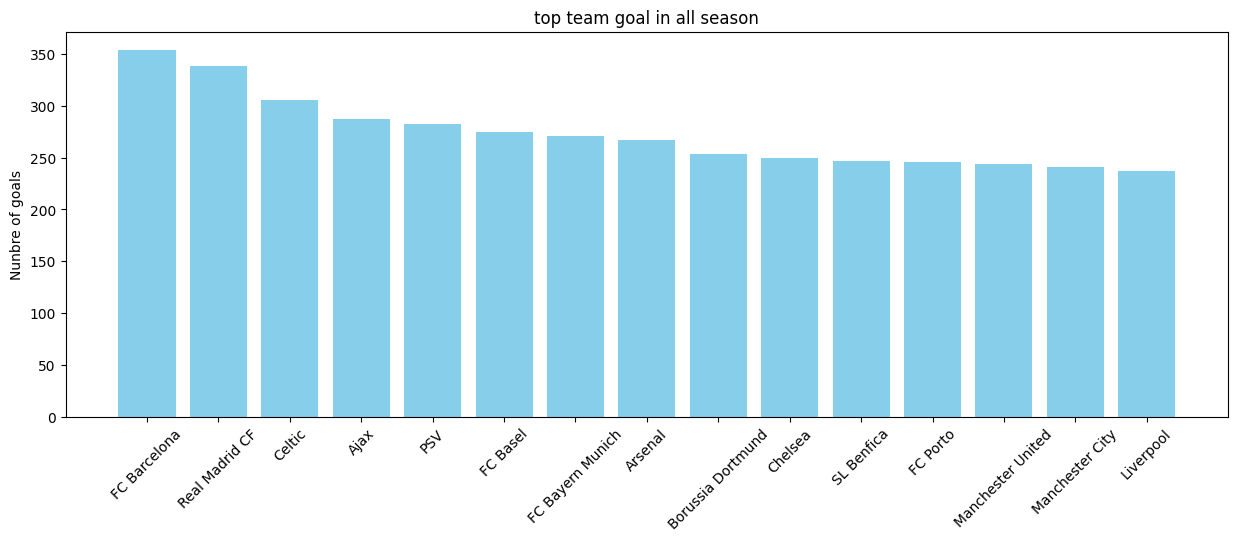

In [511]:
plt.figure(figsize=(15,5))
plt.bar(top_team_rec['away_team'].head(15) , top_team_rec['away_team_goal'].head(15) , color='skyblue')
plt.title('top team goal in all season')
plt.ylabel('Nunbre of goals')
plt.xticks(rotation=45)
plt.show()


In [512]:
#### top geal team in season
top_team_goal_sea = table_match_sp.groupby(['home_team' , table_match_sp['date'].dt.year])['home_team_goal'].sum().reset_index()
top_team_rec_sea= table_match_sp.groupby(['away_team' , table_match_sp['date'].dt.year])['away_team_goal'].sum().reset_index()
top_team_goal_sea=top_team_goal_sea.sort_values(by=['date' , 'home_team_goal'] , ascending=[True , False])
top_team_goal_sea

,home_team,date,home_team_goal
440,FC Barcelona,2008,28
1267,RSC Anderlecht,2008,28
1452,SV Werder Bremen,2008,27
1281,Rangers,2008,26
1302,Real Madrid CF,2008,25
...,...,...,...
1803,Willem II,2016,3
1843,Śląsk Wrocław,2016,3
1209,Polonia Bytom,2016,2
1411,SC Cambuur,2016,2


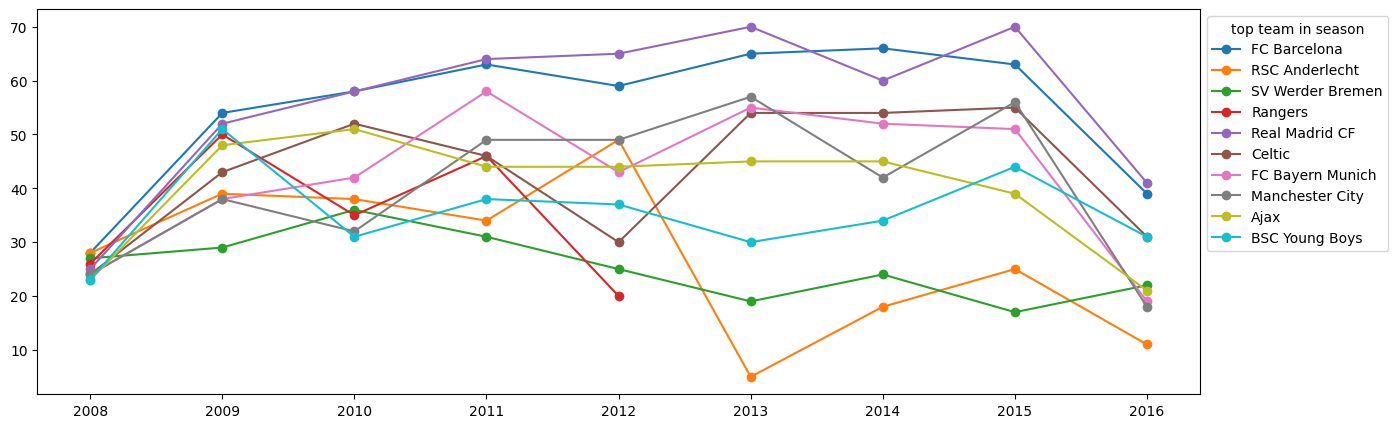

In [513]:
plt.figure(figsize=(15,5))
liste1=list(top_team_goal_sea['home_team'].unique())
for team in liste1 [:10]: 
    data_tema = top_team_goal_sea[top_team_goal_sea['home_team']==team].sort_values(by='date' , ascending=True)
    plt.plot(data_tema['date'],   data_tema['home_team_goal']  , marker='o', label=team)
plt.legend(title='top team in season' , bbox_to_anchor=(1,1))

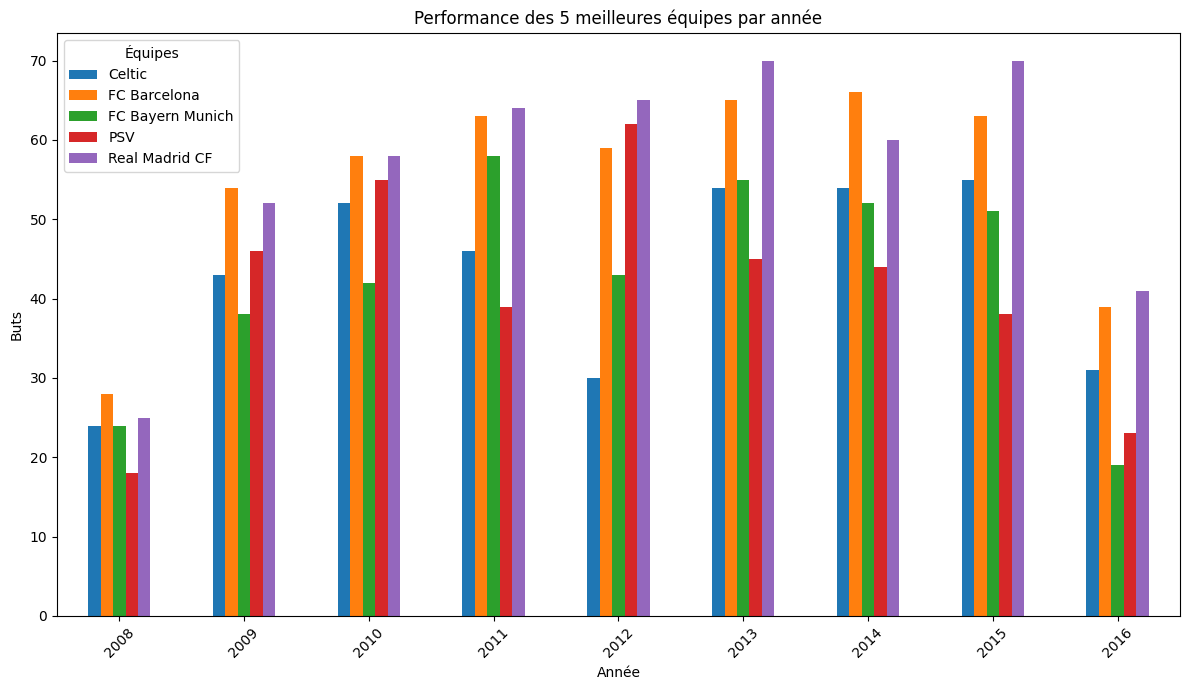

In [514]:
top_team = top_team_goal['home_team'].head(5)

top_team_goal_sea_filtered = top_team_goal_sea[top_team_goal_sea['home_team'].isin(top_team)]
team_performance = top_team_goal_sea_filtered.groupby(['date', 'home_team'])['home_team_goal'].sum().unstack(fill_value=0)

team_performance.plot(kind='bar', figsize=(12, 7))
plt.xlabel('Année')
plt.ylabel('Buts')
plt.title('Performance des 5 meilleures équipes par année')
plt.xticks(rotation=45)
plt.legend(title='Équipes')

plt.tight_layout()
plt.show()


/tmp/ipykernel_540535/3687773588.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_teams_per_year = top_team_goal_sea.groupby('date').apply(lambda x: x.nlargest(10, 'home_team_goal')).reset_index(drop=True)


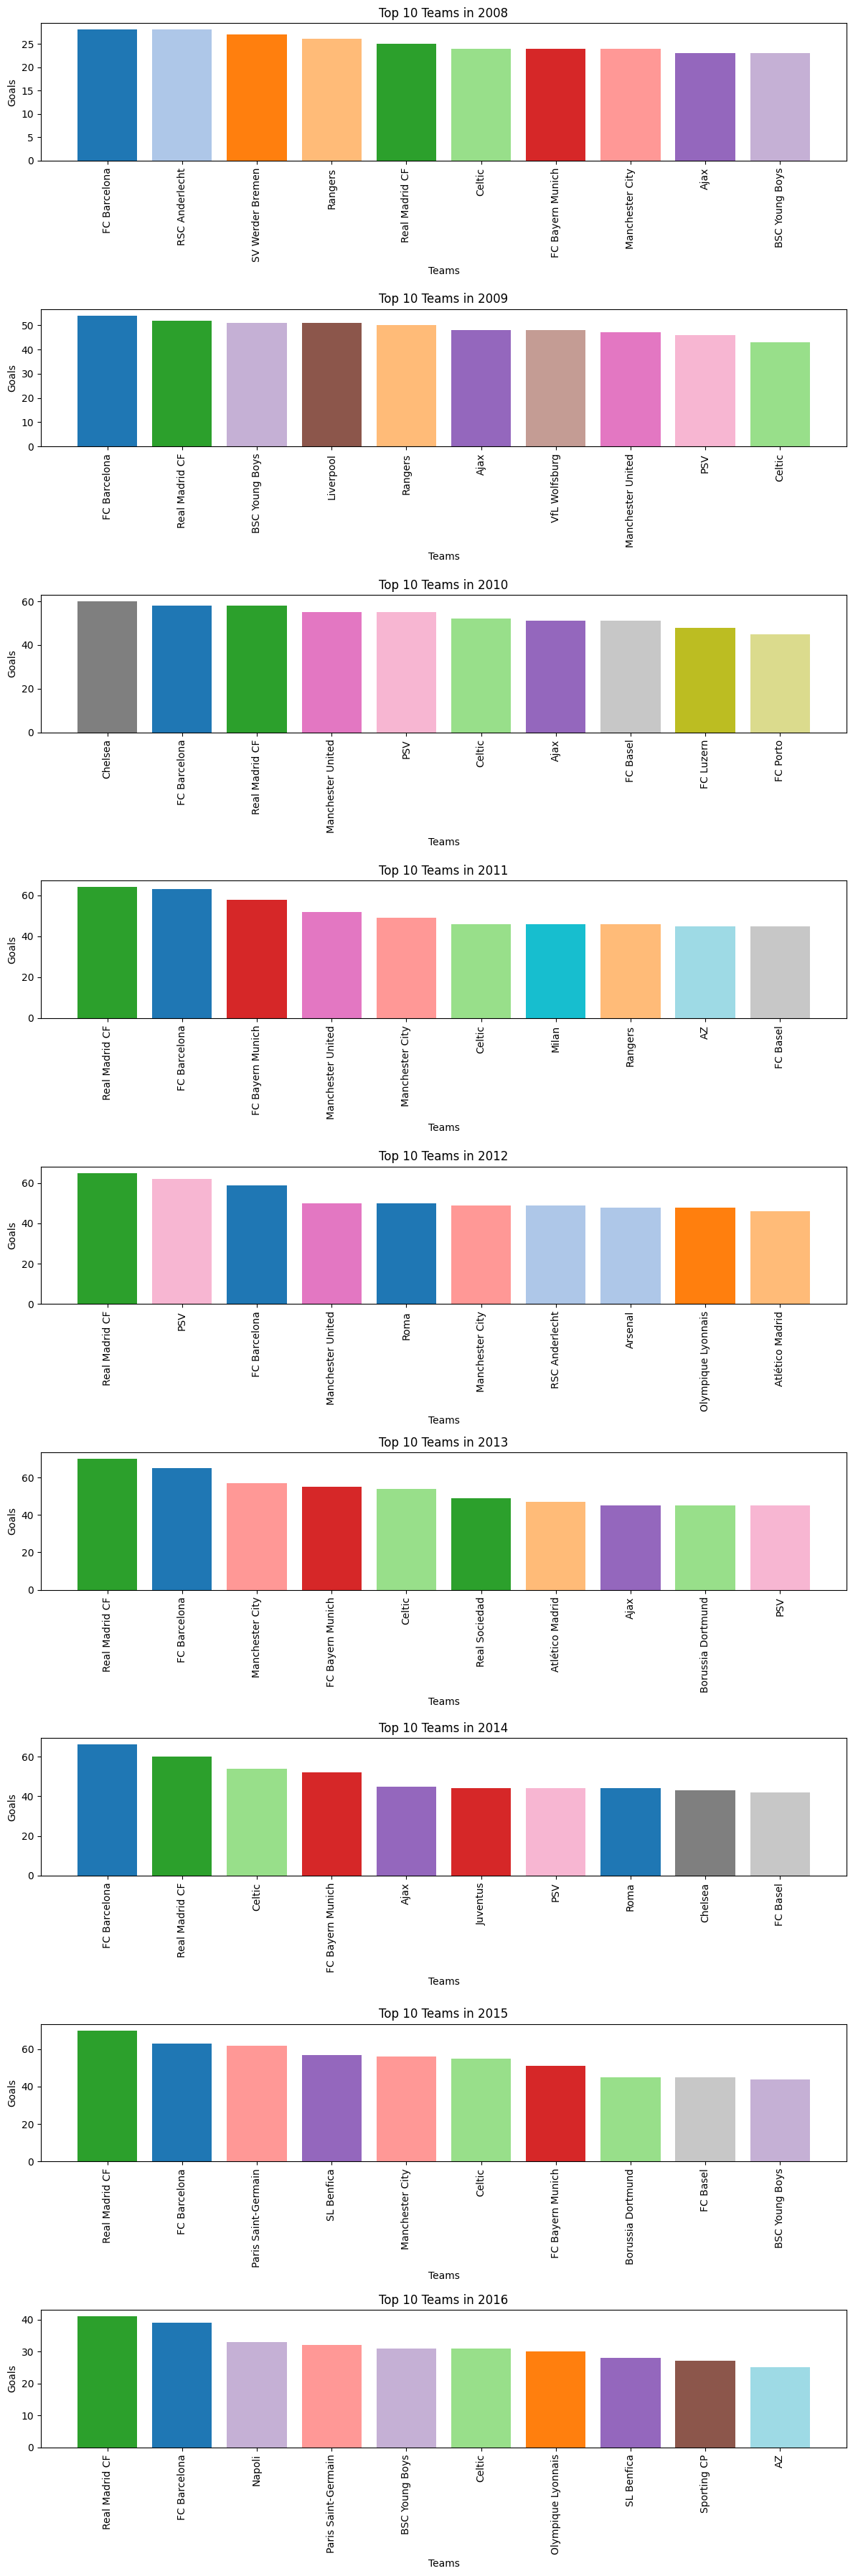

In [515]:
top_teams_per_year = top_team_goal_sea.groupby('date').apply(lambda x: x.nlargest(10, 'home_team_goal')).reset_index(drop=True)

unique_years = top_teams_per_year['date'].unique()
unique_teams = top_teams_per_year['home_team'].unique()

# Assign a unique color to each team
cmap = colormaps['tab20']  # Use updated colormap syntax
team_colors = {team: cmap(i % 20) for i, team in enumerate(unique_teams)}  # Cycle colors if > 20 teams

# Set up subplots
fig, axes = plt.subplots(len(unique_years), 1, figsize=(12, len(unique_years) * 4))

# Plot data for each year
for ax, year in zip(axes, unique_years):
    year_data = top_teams_per_year[top_teams_per_year['date'] == year]
    colors = [team_colors[team] for team in year_data['home_team']]  # Map colors to teams
    
    bars = ax.bar(year_data['home_team'], year_data['home_team_goal'], color=colors)
    
    ax.set_title(f'Top 10 Teams in {year}')
    ax.set_ylabel('Goals')
    ax.set_xlabel('Teams')
    
    # Set tick positions and labels
    ax.set_xticks(range(len(year_data['home_team'])))  # Explicitly set tick positions
    ax.set_xticklabels(year_data['home_team'], rotation=90)  # Set labels after setting ticks

plt.tight_layout()
plt.show()


### clustring

In [516]:
# # les caracteristique du joueur : overall_rating , potential  ,penalties
# lea caracteristique essentiel du attakcant : attacking_work_rate, crossing , finishing , dribbling , marking , ball_control , free_kick_accuracy
# lea caracteristique essentiel du defesnseurs : defensive_work_rate , stamina , strength , interceptions , sliding_tackle , standing_tackle
# lea caracteristique essentiel du milieux de terrain : long_passing , ball_control , vision , positioning , short_passing , reactions
# lea caracteristique essentiel du milieux de goolkeeper : gk_diving	gk_handling	gk_kicking	gk_positioning	gk_reflexes


In [517]:
table_player_attr['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [518]:
table_player_attr_grp=table_player_attr.drop(columns=['id' , 'player_fifa_api_id' , 'date' , 'agility' ,'balance' , 'jumping','shot_power' , 'acceleration', 'sprint_speed' , 'heading_accuracy'  ,'curve'] , axis=1)

In [519]:
table_player_na=table_player_attr_grp[table_player_attr_grp.isna().any(axis=1)]
liste_pl_api=table_player_na['player_api_id'].tolist()
attributes=table_player_attr_grp.columns.tolist()

In [520]:
def fill_missing_values(df, attributes, player_ids):
    for player_id in player_ids:
        for attribute in attributes:
            if df[attribute].isna().any():
                if attribute in ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']:
                    # For categorical variables, use mode (most frequent value)
                    mode_value = df[attribute].mode()[0]  # Take the first mode if there are multiple
                    df[attribute] = np.where(
                        (df[attribute].isna()) & (df['player_api_id'] == player_id), mode_value, df[attribute]
                    )
                else:
                    # For numeric variables, use the mean
                    mean_value = df[attribute].mean()
                    df[attribute] = np.where(
                        (df[attribute].isna()) & (df['player_api_id'] == player_id), mean_value, df[attribute]
                    )
    return df

In [ ]:
table_player_attr_grp = fill_missing_values(table_player_attr_grp, attributes, liste_pl_api)

In [ ]:
table_player_attr_grp

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,volleys,dribbling,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,67.0,71.0,right,medium,medium,49.0,44.0,61.0,44.0,51.0,39.0,64.0,49.0,47.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,67.0,71.0,right,medium,medium,49.0,44.0,61.0,44.0,51.0,39.0,64.0,49.0,47.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,62.0,66.0,right,medium,medium,49.0,44.0,61.0,44.0,51.0,39.0,64.0,49.0,47.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,61.0,65.0,right,medium,medium,48.0,43.0,60.0,43.0,50.0,38.0,63.0,48.0,46.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,61.0,65.0,right,medium,medium,48.0,43.0,60.0,43.0,50.0,38.0,63.0,48.0,46.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,83.0,85.0,right,medium,low,84.0,77.0,89.0,77.0,84.0,78.0,84.0,85.0,86.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,39902,78.0,80.0,right,medium,low,74.0,76.0,84.0,77.0,85.0,74.0,73.0,86.0,74.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,39902,77.0,80.0,right,medium,low,74.0,71.0,84.0,77.0,85.0,74.0,73.0,86.0,74.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,39902,78.0,81.0,right,medium,low,74.0,64.0,86.0,77.0,87.0,73.0,73.0,91.0,69.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
table_player_attr_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   overall_rating       183978 non-null  float64
 2   potential            183978 non-null  float64
 3   preferred_foot       183978 non-null  object 
 4   attacking_work_rate  183978 non-null  object 
 5   defensive_work_rate  183978 non-null  object 
 6   crossing             183978 non-null  float64
 7   finishing            183978 non-null  float64
 8   short_passing        183978 non-null  float64
 9   volleys              183978 non-null  float64
 10  dribbling            183978 non-null  float64
 11  free_kick_accuracy   183978 non-null  float64
 12  long_passing         183978 non-null  float64
 13  ball_control         183978 non-null  float64
 14  reactions            183978 non-null  float64
 15  stamina          

In [ ]:
# encoder=LabelEncoder()
# col_to_encode = ['preferred_foot' , 'attacking_work_rate' , 'defensive_work_rate']
# for col in col_to_encode :
#     table_player_attr_grp[col]=encoder.fit_transform(table_player_attr_grp[col])
 


In [ ]:
table_player_attr_grp[table_player_attr_grp['attacking_work_rate']=='stoc']

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,volleys,dribbling,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
16057,38230,76.0,80.0,right,stoc,tocky,20.0,14.0,22.0,12.0,13.0,14.0,18.0,20.0,75.0,50.0,53.0,12.0,43.0,27.0,11.0,37.0,21.0,10.0,10.0,10.0,81.0,69.0,71.0,74.0,80.0
16058,38230,70.0,74.0,right,stoc,tocky,20.0,6.0,17.0,12.0,5.0,14.0,18.0,18.0,52.0,47.0,41.0,8.0,43.0,25.0,11.0,37.0,21.0,5.0,8.0,7.0,73.0,73.0,65.0,69.0,72.0
16059,38230,70.0,74.0,right,stoc,tocky,20.0,20.0,20.0,12.0,20.0,14.0,65.0,20.0,52.0,47.0,41.0,20.0,43.0,35.0,36.0,37.0,36.0,20.0,20.0,7.0,73.0,73.0,65.0,69.0,72.0
16060,38230,64.0,71.0,right,stoc,tocky,20.0,20.0,20.0,12.0,20.0,14.0,62.0,20.0,52.0,47.0,41.0,20.0,43.0,35.0,36.0,37.0,36.0,20.0,20.0,7.0,67.0,65.0,62.0,59.0,68.0
16061,38230,64.0,71.0,right,stoc,tocky,20.0,20.0,20.0,12.0,20.0,14.0,62.0,20.0,52.0,47.0,41.0,20.0,43.0,35.0,36.0,37.0,36.0,20.0,20.0,7.0,67.0,65.0,62.0,59.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183667,27305,75.0,82.0,right,stoc,tocky,74.0,66.0,78.0,70.0,72.0,54.0,75.0,76.0,74.0,66.0,73.0,78.0,80.0,79.0,82.0,78.0,77.0,73.0,74.0,75.0,14.0,23.0,75.0,23.0,23.0
183668,27305,76.0,85.0,right,stoc,tocky,74.0,66.0,78.0,70.0,72.0,54.0,75.0,76.0,74.0,81.0,73.0,78.0,80.0,79.0,82.0,78.0,77.0,73.0,74.0,75.0,14.0,23.0,75.0,23.0,23.0
183669,27305,77.0,85.0,right,stoc,tocky,74.0,66.0,78.0,70.0,72.0,54.0,75.0,76.0,74.0,83.0,77.0,78.0,86.0,79.0,82.0,78.0,77.0,73.0,74.0,75.0,14.0,23.0,75.0,23.0,23.0
183670,27305,77.0,85.0,right,stoc,tocky,74.0,66.0,78.0,70.0,72.0,54.0,75.0,76.0,74.0,83.0,77.0,78.0,86.0,79.0,82.0,78.0,77.0,73.0,74.0,75.0,14.0,23.0,75.0,23.0,23.0


In [ ]:
table_player_attr_grp[table_player_attr_grp['player_api_id']==93987]

,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,short_passing,volleys,dribbling,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
182562,93987,59.0,66.0,right,le,ean,51.0,55.0,61.0,42.0,59.0,48.0,56.0,63.0,66.0,61.0,63.0,56.0,57.0,58.0,59.0,62.0,44.0,45.0,40.0,42.0,14.0,8.0,13.0,7.0,8.0
182563,93987,54.0,77.0,right,le,ean,43.0,56.0,57.0,42.0,59.0,45.0,49.0,64.0,65.0,40.0,33.0,46.0,47.0,47.0,50.0,62.0,53.0,40.0,42.0,42.0,4.0,21.0,49.0,21.0,21.0
182564,93987,53.0,77.0,right,le,ean,43.0,56.0,57.0,42.0,59.0,45.0,49.0,64.0,65.0,40.0,33.0,46.0,47.0,47.0,50.0,62.0,53.0,40.0,42.0,42.0,4.0,21.0,49.0,21.0,21.0
182565,93987,53.0,77.0,right,le,ean,43.0,56.0,57.0,42.0,59.0,45.0,49.0,64.0,65.0,40.0,33.0,46.0,47.0,47.0,50.0,62.0,53.0,40.0,42.0,42.0,4.0,21.0,49.0,21.0,21.0


In [ ]:
mapping_attack={
    'None' : 'low' ,
    'norm' : 'high',     
    'y'     : 'low',
    'le' : 'low', 
    'stoc' : 'high' 
}
table_player_attr_grp['attacking_work_rate']=table_player_attr_grp['attacking_work_rate'].replace(mapping_attack)

In [ ]:
table_player_attr_grp['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', '5', 'ean', 'o', '1', 'ormal', '7',
       '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [ ]:
mapping = {
    '_0': 'low',
    'o': 'high',
    '1' : 'high' , 
    '2' : 'high' , 
    '3' : 'high' , 
    '5' : 'high' , 
    '6' : 'high' , 
    '7' : 'high' , 
    '0' : 'high' , 
    '8' : 'high' , 
    '9' : 'low' , 
    '4' : 'high' , 
    'ormal': 'low',
    'ean': 'high',
    'tocky': 'low',
    'es': 'high' ,    
}
table_player_attr_grp['defensive_work_rate'] = table_player_attr_grp['defensive_work_rate'].replace(mapping)


In [ ]:
table_player_attr_grp['defensive_work_rate'].value_counts()

defensive_work_rate
medium    131682
high       30881
low        21415
Name: count, dtype: int64

In [ ]:
catg_colc=['preferred_foot' , 'attacking_work_rate' , 'defensive_work_rate']
num_col = ['overall_rating' , 'potential' , 'crossing' , 'finishing' , 'short_passing' , 
                'volleys' , 'free_kick_accuracy' , 'long_passing' , 'ball_control' , 'reactions' , 
                'stamina' , 'strength'  ,'long_shots' , 'aggression' , 'interceptions' , 'positioning' , 
                  'vision' , 'penalties' , 'marking' , 'standing_tackle' ,'sliding_tackle' , 
                  'gk_diving' ,'gk_handling' , 'gk_kicking' , 'gk_positioning' , 'gk_reflexes'
                  ]

In [ ]:
# Split into numerical and categorical
numerical_df = table_player_attr_grp[num_col]
categorical_df = table_player_attr_grp[catg_colc]

# Aggregate separately
numerical_result = numerical_df.groupby(table_player_attr_grp['player_api_id']).mean()
categorical_result = categorical_df.groupby(table_player_attr_grp['player_api_id']).agg(lambda x: x.mode()[0])

# Merge results
table_player_cls= pd.concat([numerical_result, categorical_result], axis=1)


               overall_rating  potential   crossing  finishing  short_passing  \
player_api_id                                                                   
2625                60.142857  61.142857  50.142857  47.285714      56.500000   
2752                69.380952  70.380952  36.428571  37.428571      54.809524   
2768                69.285714  70.571429  42.238095  42.761905      64.714286   
2770                71.133333  73.533333  61.866667  67.666667      72.533333   
2790                70.200000  75.800000  70.000000  37.400000      68.000000   
...                       ...        ...        ...        ...            ...   
744907              51.909091  65.909091  42.454545  44.454545      59.454545   
746419              59.000000  66.000000  55.000000  28.000000      35.000000   
748432              58.000000  68.000000  48.000000  26.000000      49.000000   
750435              56.444444  70.444444  35.000000  57.000000      60.000000   
750584              58.00000

In [ ]:
encoding=LabelEncoder()


for col in catg_colc : 
    table_player_cls[col]= encoding.fit_transform(table_player_cls[col])

In [ ]:
scaler=MinMaxScaler()

table_player_cls[num_col]=scaler.fit_transform(table_player_cls[num_col])



In [ ]:
table_player_cls

,overall_rating,potential,crossing,finishing,short_passing,volleys,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
player_api_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2625,0.348487,0.229317,0.529563,0.484757,0.542824,0.393500,0.522515,0.661311,0.577888,0.375180,0.794043,0.466472,0.605442,0.729263,0.652882,0.519699,0.539288,0.637694,0.676209,0.698758,0.577077,0.128608,0.127919,0.184403,0.093246,0.094751,1,2,2
2752,0.536282,0.438178,0.365039,0.371756,0.522845,0.191621,0.152931,0.588155,0.536727,0.537759,0.581805,0.826369,0.161565,0.838134,0.762322,0.307495,0.506702,0.318417,0.771540,0.780998,0.677785,0.113604,0.048250,0.044721,0.079166,0.147213,1,2,2
2768,0.534346,0.442484,0.434733,0.432897,0.639908,0.287363,0.167091,0.556802,0.546057,0.668377,0.560828,0.624879,0.159864,0.626152,0.800752,0.450566,0.567528,0.275961,0.778210,0.780423,0.836042,0.109853,0.163826,0.226891,0.146643,0.113488,0,2,2
2770,0.571905,0.509449,0.670209,0.718401,0.732320,0.728214,0.745398,0.718559,0.780615,0.611822,0.453475,0.559184,0.797619,0.554032,0.452437,0.678625,0.725350,0.661847,0.294163,0.380837,0.223797,0.086275,0.161021,0.279209,0.159926,0.168625,1,2,1
2790,0.552932,0.560696,0.767781,0.371429,0.678741,0.450945,0.587596,0.712869,0.666135,0.659484,0.704829,0.673469,0.433333,0.694355,0.668421,0.634529,0.593053,0.559036,0.812451,0.828502,0.716151,0.078772,0.176730,0.650101,0.162901,0.173122,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,0.181107,0.337075,0.437330,0.452301,0.577744,0.444678,0.445509,0.574537,0.535380,0.429752,0.492344,0.386518,0.386364,0.307918,0.189527,0.498369,0.495594,0.523549,0.402193,0.512736,0.497440,0.083887,0.134958,0.107228,0.105490,0.072560,0,2,2
746419,0.325254,0.339130,0.587832,0.263668,0.288718,0.290098,0.392523,0.288562,0.530142,0.525253,0.608952,0.333333,0.250000,0.580645,0.546784,0.571749,0.364956,0.409639,0.583658,0.760870,0.637822,0.067519,0.094256,0.043611,0.078103,0.078692,1,0,2
748432,0.304926,0.384348,0.503856,0.240741,0.454183,0.232653,0.166525,0.361718,0.380319,0.350168,0.440518,0.619048,0.226190,0.495968,0.570175,0.381166,0.319336,0.433735,0.677043,0.760870,0.704961,0.078772,0.070692,0.101927,0.111576,0.044967,1,2,2


In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4 , random_state=42)

table_player_cls['cluster']=kmeans.fit_predict(table_player_cls)

In [ ]:
table_player_cls[['cluster'] ]

,cluster
player_api_id,
2625,1
2752,1
2768,1
2770,1
2790,2
...,...
744907,1
746419,3
748432,1


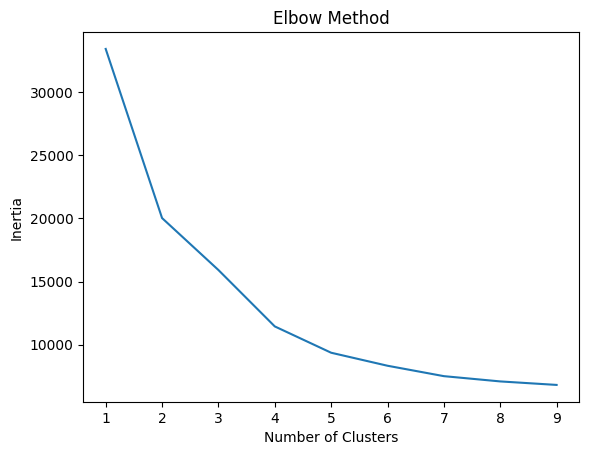

In [ ]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):  # Trying different cluster sizes (1 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_player_cls)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


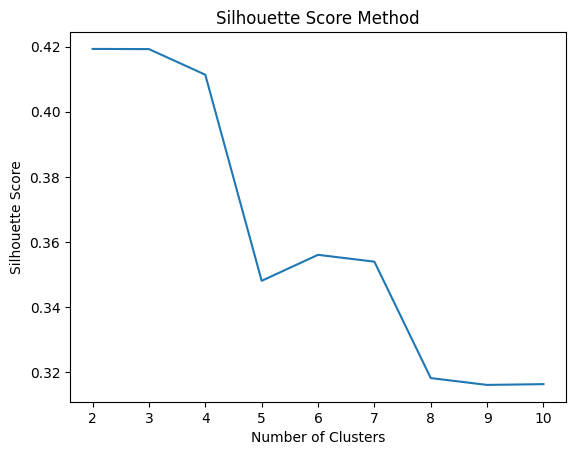

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Trying different cluster sizes (2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_player_cls)
    silhouette_scores.append(silhouette_score(table_player_cls, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [ ]:
# Group by the 'cluster' column and calculate the mean for each cluster
cluster_summary = table_player_cls.groupby('cluster').mean().reset_index()

# Print the summary of clusters
cluster_summary.head()


,cluster,overall_rating,potential,crossing,finishing,short_passing,volleys,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,0,0.480076,0.460095,0.156237,0.153261,0.205433,0.169861,0.149921,0.278782,0.174043,0.542308,0.336781,0.572686,0.150367,0.305495,0.249459,0.192828,0.276459,0.248776,0.159287,0.160223,0.157429,0.753496,0.738240,0.695966,0.707520,0.757191,0.885806,1.987193,1.917823
1,1,0.468436,0.464694,0.585078,0.511462,0.615434,0.518890,0.514157,0.548493,0.630994,0.574199,0.649531,0.613643,0.555526,0.598012,0.538645,0.577878,0.560105,0.557113,0.503004,0.548937,0.491250,0.099913,0.117904,0.179870,0.111855,0.112193,0.746143,1.961976,1.830606
2,2,0.511570,0.492891,0.584695,0.482291,0.635437,0.503104,0.509867,0.586927,0.629312,0.608732,0.708294,0.671554,0.551869,0.692143,0.649920,0.576605,0.579206,0.555451,0.608450,0.661003,0.592890,0.106828,0.136331,0.239888,0.129312,0.131192,0.783159,1.266924,0.020363
3,3,0.514316,0.512207,0.664000,0.599591,0.642385,0.592737,0.567077,0.563941,0.683416,0.618529,0.696559,0.580709,0.630114,0.587161,0.495412,0.662888,0.604637,0.600871,0.444694,0.491484,0.445319,0.100732,0.113805,0.157523,0.107507,0.107301,0.709370,0.013235,1.799894


In [ ]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)  # Adjust eps and min_samples as needed
table_player_cls['clusterDB'] = dbscan.fit_predict(table_player_cls)


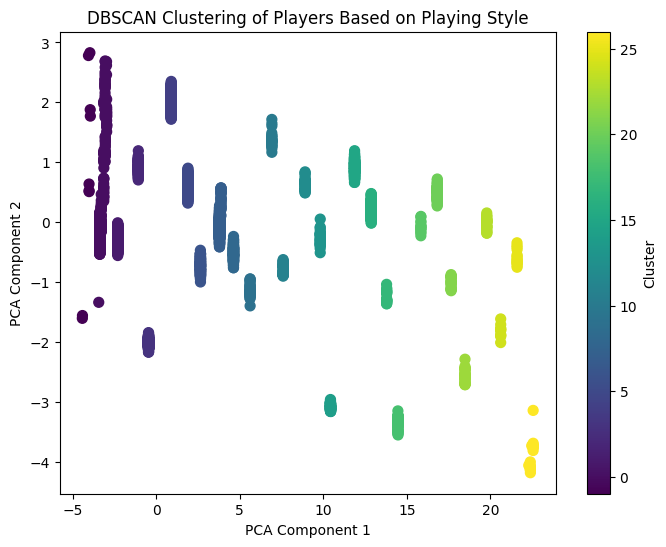

In [ ]:
# Reduce the data to 2D using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(table_player_cls)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=table_player_cls['clusterDB'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering of Players Based on Playing Style")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
table_player_cls

,overall_rating,potential,crossing,finishing,short_passing,volleys,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,cluster,clusterDB
player_api_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2625,0.348487,0.229317,0.529563,0.484757,0.542824,0.393500,0.522515,0.661311,0.577888,0.375180,0.794043,0.466472,0.605442,0.729263,0.652882,0.519699,0.539288,0.637694,0.676209,0.698758,0.577077,0.128608,0.127919,0.184403,0.093246,0.094751,1,2,2,1,0
2752,0.536282,0.438178,0.365039,0.371756,0.522845,0.191621,0.152931,0.588155,0.536727,0.537759,0.581805,0.826369,0.161565,0.838134,0.762322,0.307495,0.506702,0.318417,0.771540,0.780998,0.677785,0.113604,0.048250,0.044721,0.079166,0.147213,1,2,2,1,0
2768,0.534346,0.442484,0.434733,0.432897,0.639908,0.287363,0.167091,0.556802,0.546057,0.668377,0.560828,0.624879,0.159864,0.626152,0.800752,0.450566,0.567528,0.275961,0.778210,0.780423,0.836042,0.109853,0.163826,0.226891,0.146643,0.113488,0,2,2,1,0
2770,0.571905,0.509449,0.670209,0.718401,0.732320,0.728214,0.745398,0.718559,0.780615,0.611822,0.453475,0.559184,0.797619,0.554032,0.452437,0.678625,0.725350,0.661847,0.294163,0.380837,0.223797,0.086275,0.161021,0.279209,0.159926,0.168625,1,2,1,1,1
2790,0.552932,0.560696,0.767781,0.371429,0.678741,0.450945,0.587596,0.712869,0.666135,0.659484,0.704829,0.673469,0.433333,0.694355,0.668421,0.634529,0.593053,0.559036,0.812451,0.828502,0.716151,0.078772,0.176730,0.650101,0.162901,0.173122,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744907,0.181107,0.337075,0.437330,0.452301,0.577744,0.444678,0.445509,0.574537,0.535380,0.429752,0.492344,0.386518,0.386364,0.307918,0.189527,0.498369,0.495594,0.523549,0.402193,0.512736,0.497440,0.083887,0.134958,0.107228,0.105490,0.072560,0,2,2,1,0
746419,0.325254,0.339130,0.587832,0.263668,0.288718,0.290098,0.392523,0.288562,0.530142,0.525253,0.608952,0.333333,0.250000,0.580645,0.546784,0.571749,0.364956,0.409639,0.583658,0.760870,0.637822,0.067519,0.094256,0.043611,0.078103,0.078692,1,0,2,3,4
748432,0.304926,0.384348,0.503856,0.240741,0.454183,0.232653,0.166525,0.361718,0.380319,0.350168,0.440518,0.619048,0.226190,0.495968,0.570175,0.381166,0.319336,0.433735,0.677043,0.760870,0.704961,0.078772,0.070692,0.101927,0.111576,0.044967,1,2,2,1,0


In [ ]:
table_player_cls['cluster'].unique()

array([1, 2, 0, 3], dtype=int32)

In [ ]:
table_player_cls[table_player_cls['cluster']==2]

,overall_rating,potential,crossing,finishing,short_passing,volleys,free_kick_accuracy,long_passing,ball_control,reactions,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate,cluster,clusterDB
player_api_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2790,0.552932,0.560696,0.767781,0.371429,0.678741,0.450945,0.587596,0.712869,0.666135,0.659484,0.704829,0.673469,0.433333,0.694355,0.668421,0.634529,0.593053,0.559036,0.812451,0.828502,0.716151,0.078772,0.176730,0.650101,0.162901,0.173122,0,1,0,2,2
3140,0.464649,0.452174,0.611825,0.560091,0.690560,0.577324,0.542056,0.680471,0.661854,0.677409,0.805149,0.587949,0.607143,0.651498,0.722222,0.520500,0.684292,0.616179,0.607004,0.676329,0.626632,0.104494,0.171681,0.545132,0.159394,0.141324,1,1,0,2,5
3441,0.480621,0.408571,0.631534,0.335727,0.623024,0.537933,0.569244,0.635184,0.591059,0.636764,0.668181,0.702624,0.602891,0.777650,0.791562,0.568546,0.698956,0.449225,0.702890,0.744479,0.720147,0.085203,0.170839,0.234389,0.135485,0.154172,1,2,0,2,7
4902,0.616320,0.537470,0.618369,0.577882,0.775979,0.622758,0.652043,0.703115,0.806214,0.714264,0.812721,0.687693,0.659632,0.822031,0.788145,0.660925,0.728875,0.571194,0.568270,0.770202,0.656132,0.098210,0.100147,0.241356,0.097883,0.109862,1,2,0,2,7
4939,0.340962,0.241502,0.453143,0.157888,0.474060,0.122463,0.145439,0.391646,0.502901,0.406540,0.724971,0.747681,0.185065,0.804435,0.616427,0.472381,0.482633,0.205367,0.618677,0.646684,0.531009,0.103836,0.130138,0.175618,0.150628,0.124170,1,2,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680031,0.284597,0.339130,0.491859,0.378307,0.631466,0.382011,0.463891,0.605573,0.530142,0.408530,0.414605,0.510204,0.380952,0.592742,0.500000,0.448430,0.581649,0.481928,0.618677,0.640097,0.704961,0.135038,0.141384,0.101927,0.066946,0.134900,1,2,0,2,7
693138,0.370993,0.542609,0.545844,0.298060,0.501458,0.387755,0.368734,0.440971,0.475399,0.386644,0.583039,0.503401,0.300595,0.483871,0.590643,0.344731,0.333593,0.445783,0.618677,0.803140,0.679784,0.056266,0.106038,0.055274,0.100418,0.078692,0,2,0,2,7
696443,0.452306,0.630217,0.311911,0.207782,0.470434,0.278609,0.333050,0.421158,0.492686,0.404882,0.591137,0.877551,0.178571,0.601815,0.602339,0.284473,0.330741,0.421687,0.679961,0.744263,0.727341,0.101279,0.058910,0.031947,0.133891,0.078692,1,2,0,2,7


In [ ]:
table_player[table_player['player_api_id']==3140]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
478,481,3140,Alexandre Hauw,49467,1982-01-22 00:00:00,175.26,150


In [ ]:
table_team_sp=table_team_sp.drop(columns=['id' , 'date' , 'buildUpPlaySpeedClass' , 'buildUpPlayDribblingClass' , 'buildUpPlayPassingClass' , 'chanceCreationPassingClass' , 
                                          'chanceCreationCrossingClass' , 'chanceCreationShootingClass' , 'chanceCreationPositioningClass', 
                                          'defencePressureClass' ,'defenceAggressionClass' , 'defenceTeamWidthClass' ,  ])

In [ ]:
table_team_sp=table_team_sp.drop(columns=['team_long_name' , 'team_short_name'])

In [ ]:
table_team_sp

,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,defenceDefenderLineClass
0,9930,60,32.0,50,Organised,60,65,55,50,55,45,Cover
1,9930,52,48.0,56,Organised,54,63,64,47,44,54,Cover
2,9930,47,41.0,54,Organised,54,63,64,47,44,54,Cover
3,8485,70,26.0,70,Organised,70,70,70,60,70,70,Cover
4,8485,47,24.0,52,Organised,53,48,52,47,47,52,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...
1453,10000,52,27.0,52,Organised,52,48,53,46,48,53,Cover
1454,10000,54,32.0,51,Organised,47,52,50,44,55,53,Cover
1455,10000,54,32.0,51,Organised,47,52,32,44,58,37,Cover
1456,10000,54,42.0,51,Organised,47,52,32,44,58,37,Cover


In [ ]:
goal_Res = pd.merge(df_goal[['match_api_id']] , 
                    table_match_sp[['match_api_id' , 'home_team_goal' ,'away_team_goal' , 'home_team' , 'away_team']] , 
                    on='match_api_id' , how='right')

goal_Res

,match_api_id,home_team_goal,away_team_goal,home_team,away_team
0,492473,1,1,KRC Genk,Beerschot AC
1,492474,0,0,SV Zulte-Waregem,Sporting Lokeren
2,492475,0,3,KSV Cercle Brugge,RSC Anderlecht
3,492476,5,0,KAA Gent,RAEC Mons
4,492477,1,3,FCV Dender EH,Standard de Liège
...,...,...,...,...,...
25974,1992091,1,0,FC St. Gallen,FC Thun
25975,1992092,1,2,FC Vaduz,FC Luzern
25976,1992093,2,0,Grasshopper Club Zürich,FC Sion
25977,1992094,0,0,Lugano,FC Zürich


In [ ]:
top_team_home_goal=goal_Res.groupby('home_team')['home_team_goal'].sum().reset_index()
top_team_home_goal.sort_values(by='home_team_goal' , ascending=False)

,home_team,home_team_goal
211,Real Madrid CF,505
75,FC Barcelona,495
49,Celtic,389
77,FC Bayern Munich,382
184,PSV,370
...,...,...
5,AC Arles-Avignon,14
264,Trofense,14
103,Feirense,13
56,Córdoba CF,12


In [ ]:
top_team_home_goal=goal_Res.groupby('away_team')['away_team_goal'].sum().reset_index()
top_team_home_goal.sort_values(by='away_team_goal' , ascending=False)

,away_team,away_team_goal
75,FC Barcelona,354
211,Real Madrid CF,338
49,Celtic,306
15,Ajax,287
184,PSV,282
...,...,...
78,FC Dordrecht,9
270,Uniao da Madeira,8
5,AC Arles-Avignon,7
216,Reggio Calabria,7


In [ ]:

top_team_home_res=goal_Res.groupby('away_team')['home_team_goal'].sum().reset_index()
top_team_home_res.sort_values(by='home_team_goal' , ascending=False)

,away_team,home_team_goal
112,Getafe CF,278
125,Heracles Almelo,272
122,Hannover 96,270
7,ADO Den Haag,268
235,SV Werder Bremen,268
...,...,...
234,SV Darmstadt 98,24
259,Termalica Bruk-Bet Nieciecza,24
17,Angers SCO,23
16,Amadora,23


In [ ]:
top_team_away_res=goal_Res.groupby('home_team')['away_team_goal'].sum().reset_index()
top_team_away_res.sort_values(by='away_team_goal' , ascending=False)

,home_team,away_team_goal
144,Kilmarnock,238
235,SV Werder Bremen,203
229,SC Heerenveen,202
167,Motherwell,201
7,ADO Den Haag,200
...,...,...
81,FC Ingolstadt 04,18
267,UD Las Palmas,17
270,Uniao da Madeira,17
16,Amadora,15


In [ ]:
num_col=['buildUpPlaySpeed' , 'buildUpPlayDribbling' ,'buildUpPlayPassing' , 'chanceCreationPassing' , 'chanceCreationCrossing',
          'chanceCreationShooting' , 'defencePressure' , 'defenceAggression' ,'defenceTeamWidth' ]
catg_colc=['buildUpPlayPositioningClass' ,'defenceDefenderLineClass' ]

In [ ]:
# Split into numerical and categorical
numerical_df = table_team_sp[num_col]
categorical_df = table_team_sp[catg_colc]

# Aggregate separately
numerical_result = numerical_df.groupby(table_team_sp['team_api_id']).mean()
categorical_result = categorical_df.groupby(table_team_sp['team_api_id']).agg(lambda x: x.mode()[0])

# Merge results
table_team_cls= pd.concat([numerical_result, categorical_result], axis=1)


In [ ]:
table_team_cls

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlayPositioningClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,
1601,47.333333,35.000000,46.166667,55.500000,60.333333,53.500000,47.166667,47.333333,49.333333,Organised,Cover
1773,52.000000,38.000000,50.000000,50.000000,53.000000,54.000000,43.000000,44.000000,50.000000,Organised,Cover
1957,47.166667,35.500000,52.666667,50.833333,36.333333,67.000000,49.333333,56.333333,53.666667,Organised,Cover
2033,49.000000,35.200000,48.400000,51.800000,44.200000,48.200000,42.200000,33.800000,45.400000,Organised,Cover
2182,60.333333,35.500000,49.000000,56.666667,57.333333,68.000000,51.666667,48.500000,54.500000,Organised,Cover
...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,33.333333,53.666667,50.333333,59.166667,50.333333,45.500000,51.166667,52.666667,Organised,Cover
108893,43.166667,33.833333,53.166667,46.000000,38.333333,39.500000,38.333333,46.000000,46.333333,Organised,Cover
158085,67.000000,66.000000,39.000000,55.000000,59.000000,46.000000,36.000000,38.000000,37.000000,Organised,Cover


In [ ]:
table_team_cls[num_col]=scaler.fit_transform(table_team_cls[num_col])
for col in catg_colc : 
    table_team_cls[col]= encoding.fit_transform(table_team_cls[col])

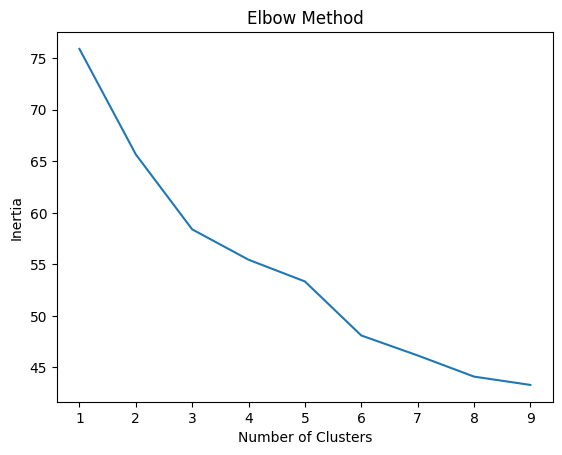

In [ ]:
inertia = []
for k in range(1, 10):  # Trying different cluster sizes (1 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_team_cls)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

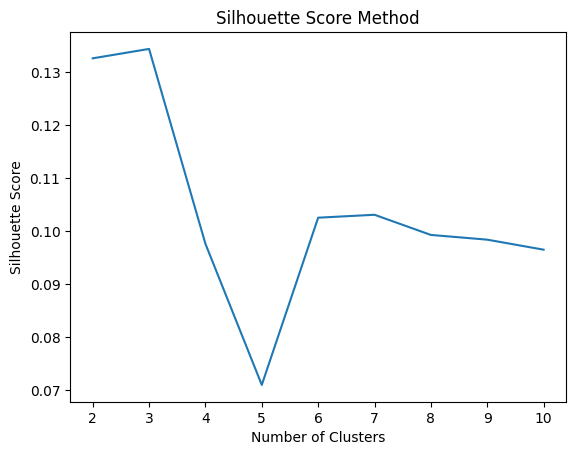

In [ ]:
silhouette_scores = []
for k in range(2, 11):  # Trying different cluster sizes (2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(table_team_cls)
    silhouette_scores.append(silhouette_score(table_team_cls, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3 , random_state=42)

table_team_cls['cluster']=kmeans.fit_predict(table_team_cls)

In [ ]:
table_team_cls

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlayPositioningClass,defenceDefenderLineClass,cluster
team_api_id,,,,,,,,,,,,
1601,0.416988,0.261905,0.343972,0.656652,0.618321,0.505,0.484962,0.433333,0.483333,1,0,1
1773,0.525097,0.333333,0.425532,0.515021,0.450382,0.520,0.390977,0.350000,0.500000,1,0,2
1957,0.413127,0.273810,0.482270,0.536481,0.068702,0.910,0.533835,0.658333,0.591667,1,0,0
2033,0.455598,0.266667,0.391489,0.561373,0.248855,0.346,0.372932,0.095000,0.385000,1,0,2
2182,0.718147,0.273810,0.404255,0.686695,0.549618,0.940,0.586466,0.462500,0.612500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10281,0.544402,0.222222,0.503546,0.523605,0.591603,0.410,0.447368,0.529167,0.566667,1,0,1
108893,0.320463,0.234127,0.492908,0.412017,0.114504,0.085,0.285714,0.400000,0.408333,1,0,2
158085,0.872587,1.000000,0.191489,0.643777,0.587786,0.280,0.233083,0.200000,0.175000,1,0,2


In [ ]:
original_data=table_team_cls

In [ ]:
original_data[num_col]=scaler.inverse_transform(table_team_cls[num_col])
for col in catg_colc : 
    original_data[col]= encoding.inverse_transform(table_team_cls[col])

In [ ]:
cluster_0 = original_data[original_data['cluster']==0].describe()

In [ ]:
cluster_0

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,cluster
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,46.745652,33.826570,43.220290,49.562802,49.325121,58.348792,49.491546,50.664010,55.807488,0.0
std,7.477196,3.799765,5.376284,6.236458,6.963540,4.806115,6.170924,5.791257,4.618416,0.0
min,29.333333,25.000000,32.333333,35.000000,33.333333,49.666667,31.666667,37.833333,41.166667,0.0
25%,41.600000,32.000000,39.666667,45.166667,46.000000,55.200000,46.500000,46.500000,53.333333,0.0
50%,48.166667,34.833333,43.666667,50.333333,49.600000,57.333333,49.166667,50.166667,55.600000,0.0
75%,51.166667,36.500000,47.333333,53.833333,53.666667,61.500000,52.000000,53.833333,58.000000,0.0
max,64.333333,40.400000,55.333333,67.500000,62.500000,70.000000,70.000000,70.000000,67.000000,0.0


In [ ]:
from scipy.stats import ttest_ind

# Liste des variables continues
variables = ['buildUpPlaySpeed', 'buildUpPlayDribbling']  # Remplacez par vos noms de colonnes

for var in variables:
    t_stat, p_val = ttest_ind(cluster_0[var], cluster_1[var])
    print(f"Variable: {var} - Statistique t: {t_stat:.2f}, p-value: {p_val:.4f}")


Variable: buildUpPlaySpeed - Statistique t: -1.00, p-value: 0.3320
Variable: buildUpPlayDribbling - Statistique t: -0.55, p-value: 0.5915


In [ ]:
cluster_1=original_data[original_data['cluster']==1].describe()

In [ ]:
cluster_2=original_data[original_data['cluster']==2].describe()

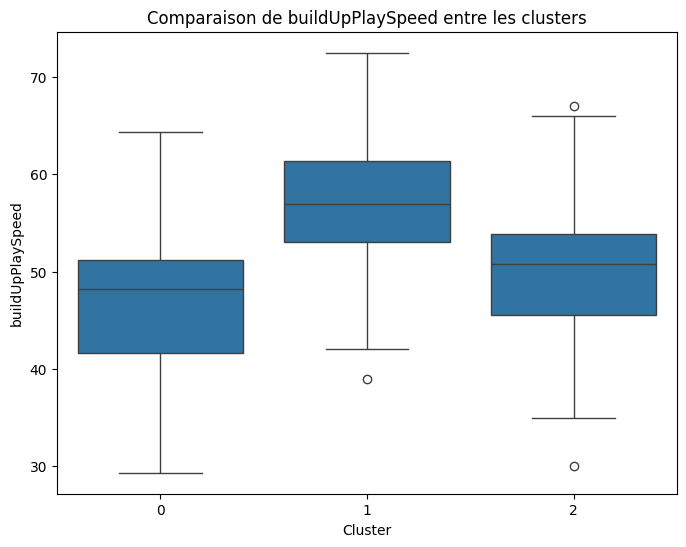

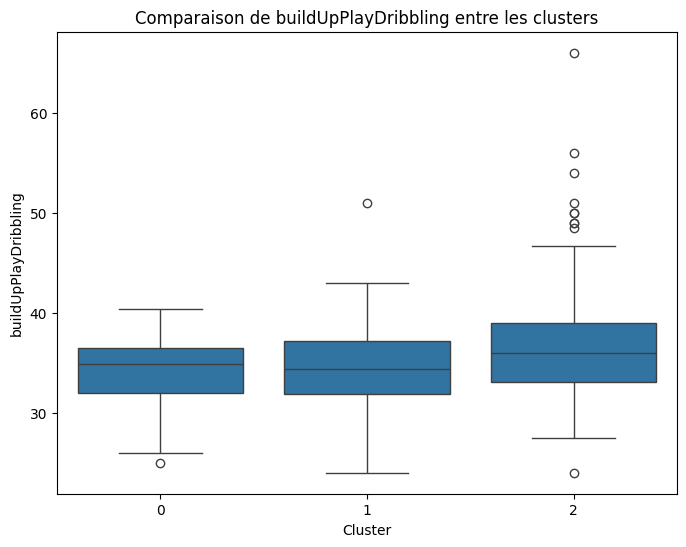

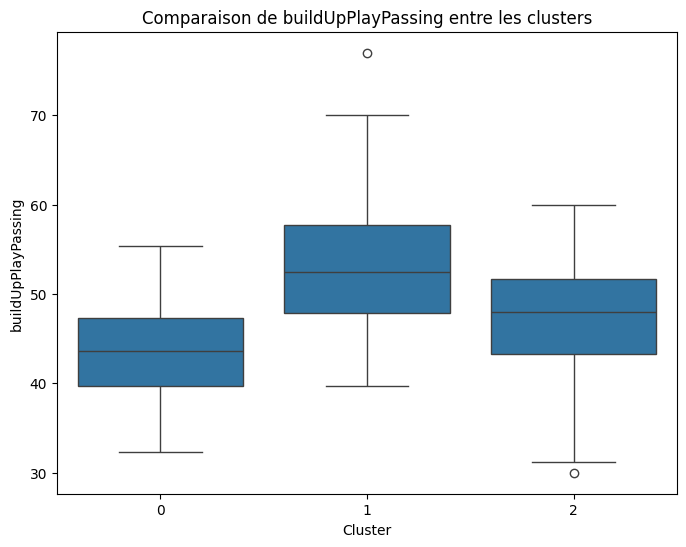

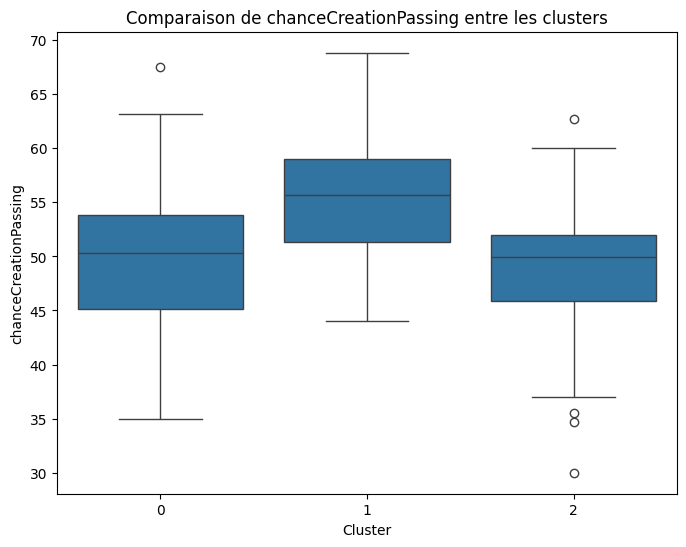

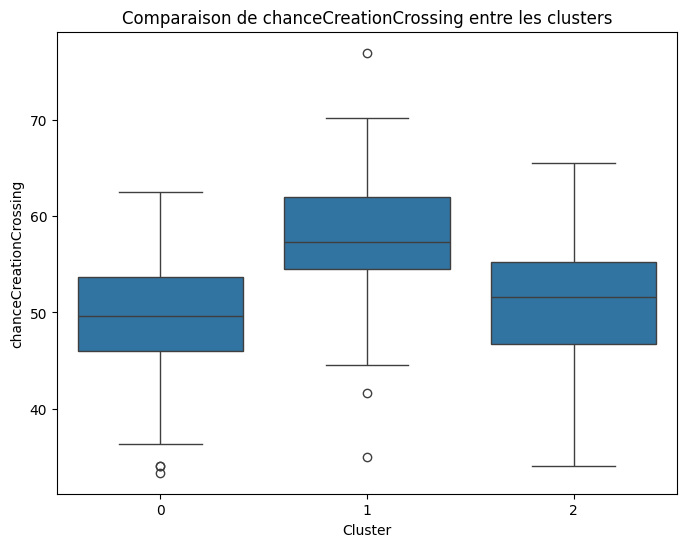

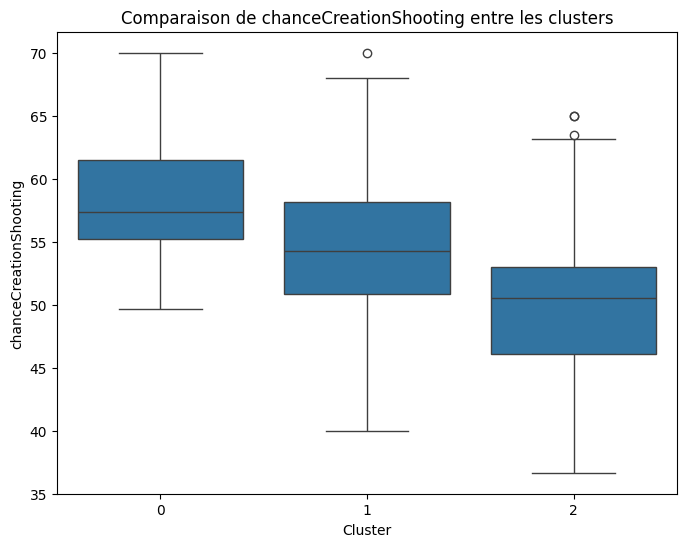

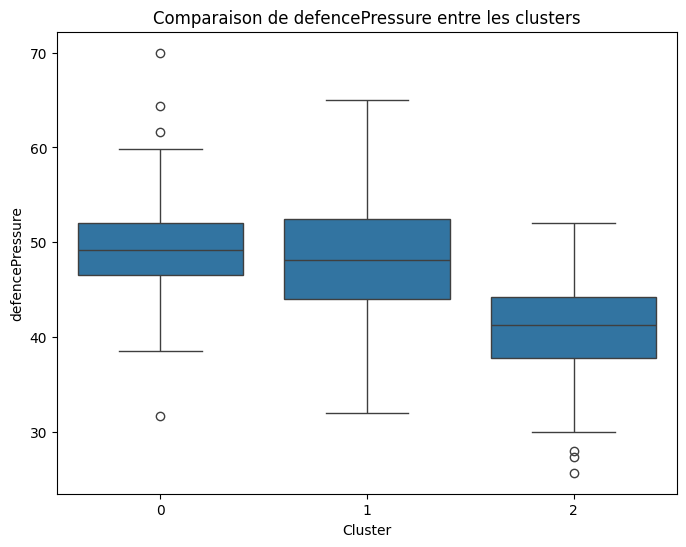

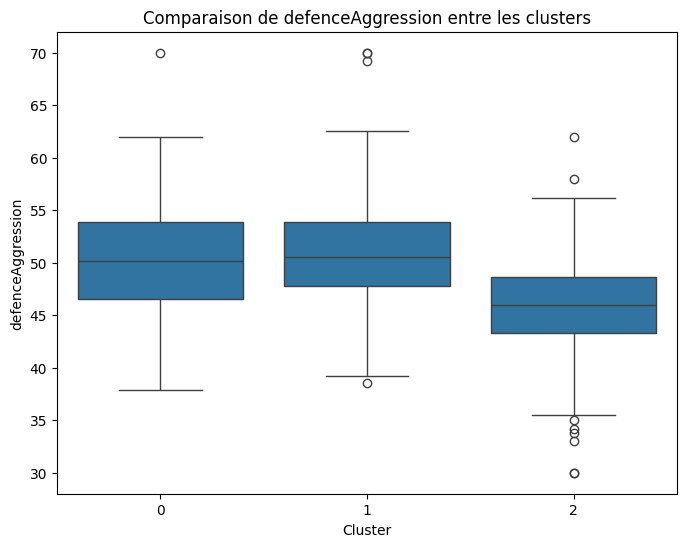

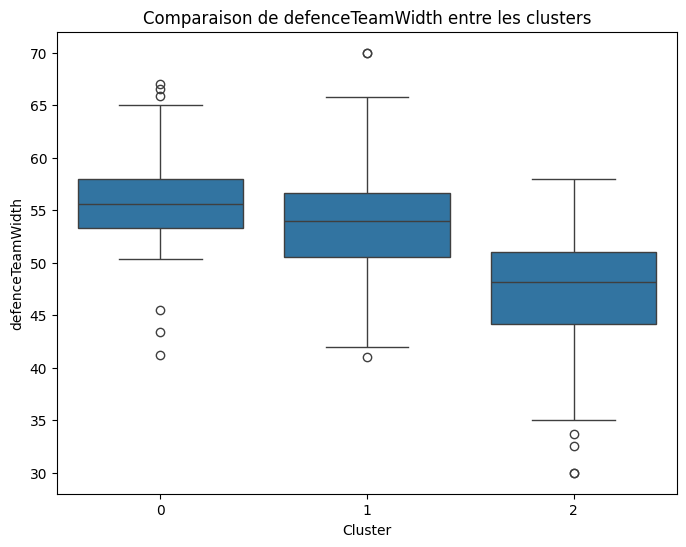

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à comparer
variables = ['buildUpPlaySpeed' ,	'buildUpPlayDribbling',	'buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing'	,'chanceCreationShooting'	,
             'defencePressure' ,	'defenceAggression' , 	'defenceTeamWidth']	
# Générer des boxplots
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=var, data=original_data)
    plt.title(f"Comparaison de {var} entre les clusters")
    plt.xlabel("Cluster")
    plt.ylabel(var)
    plt.show()


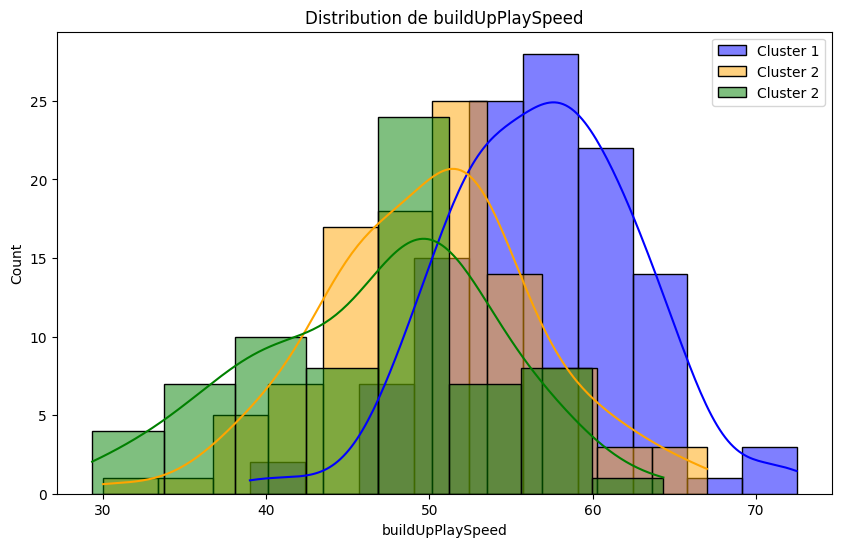

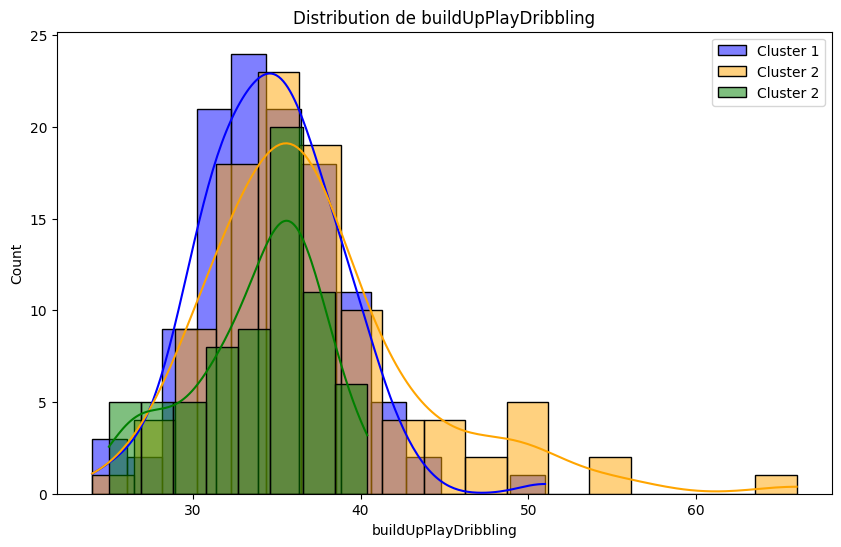

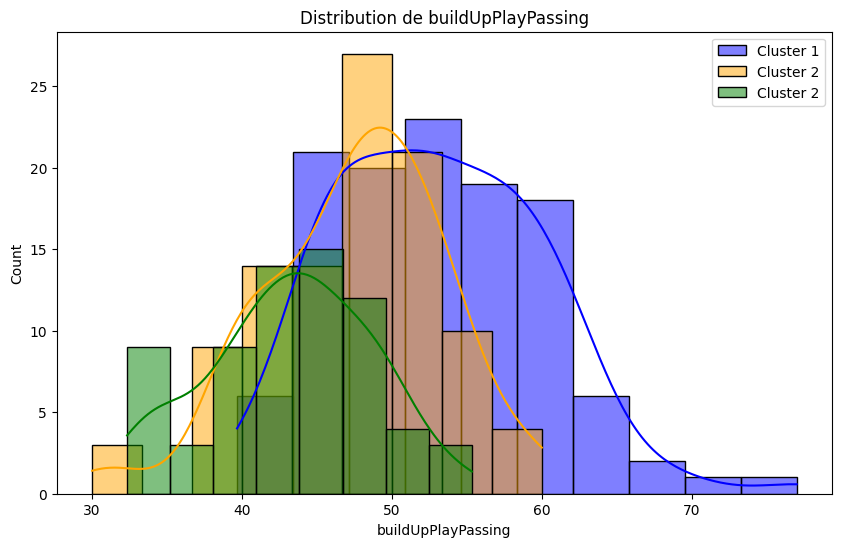

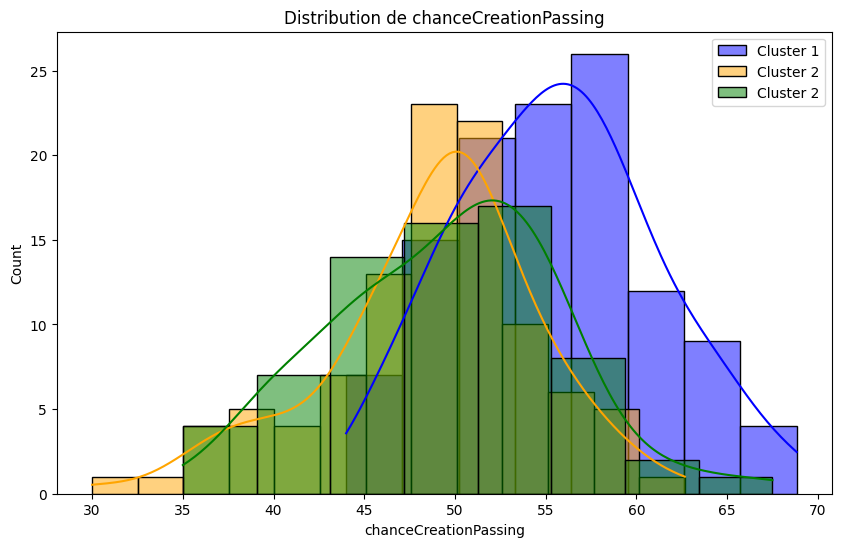

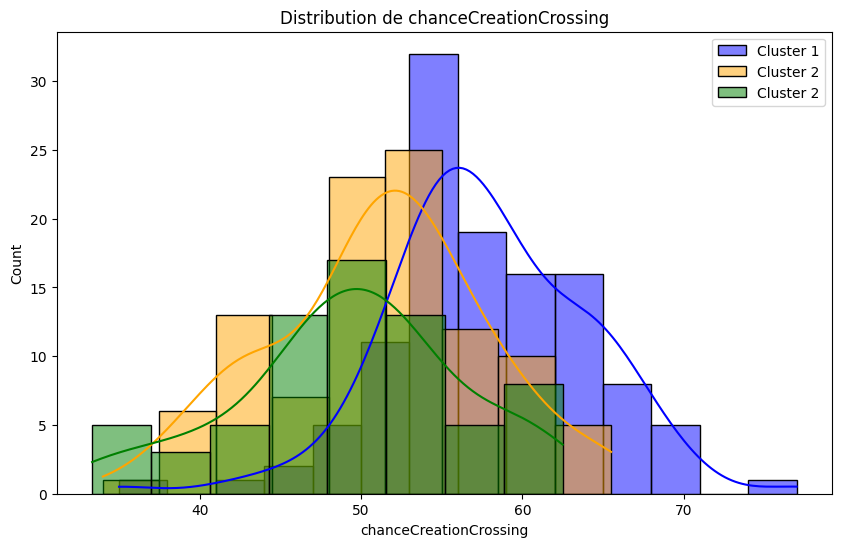

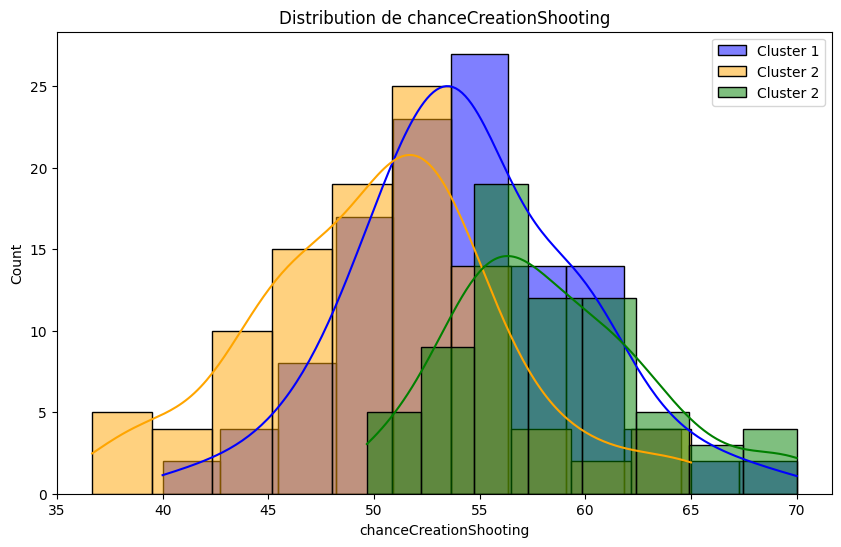

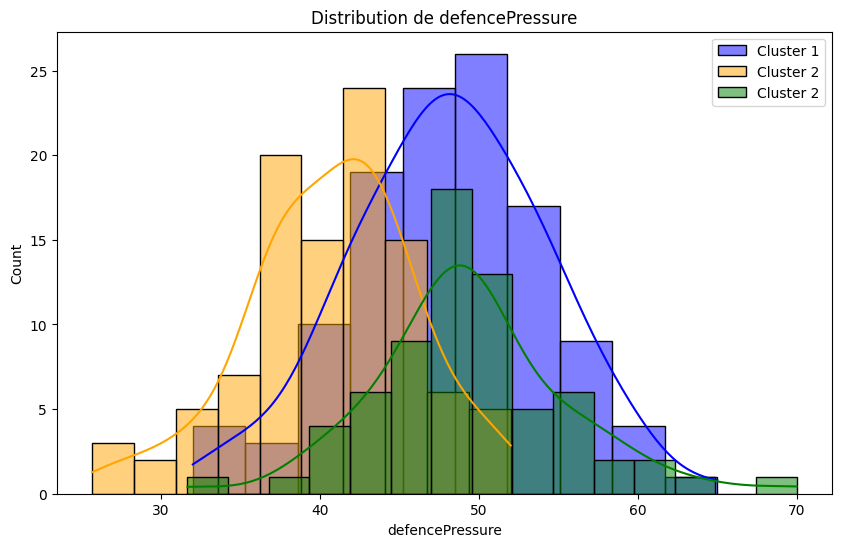

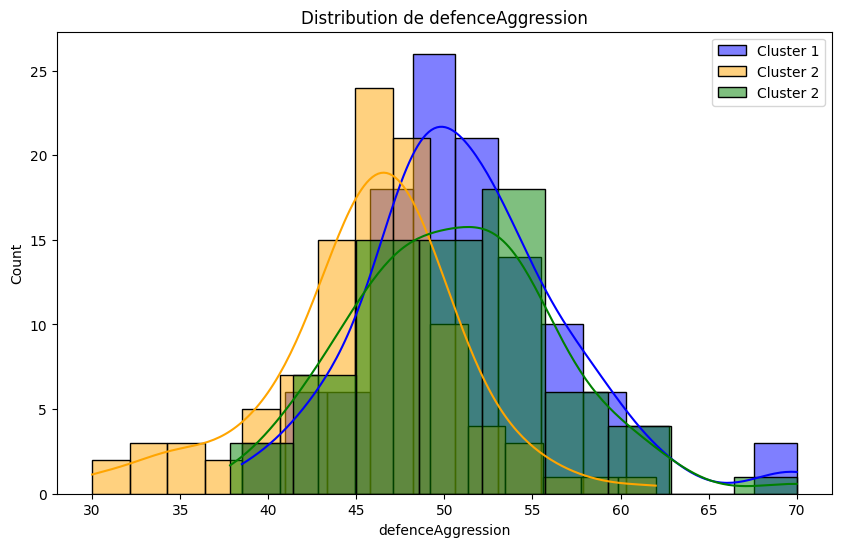

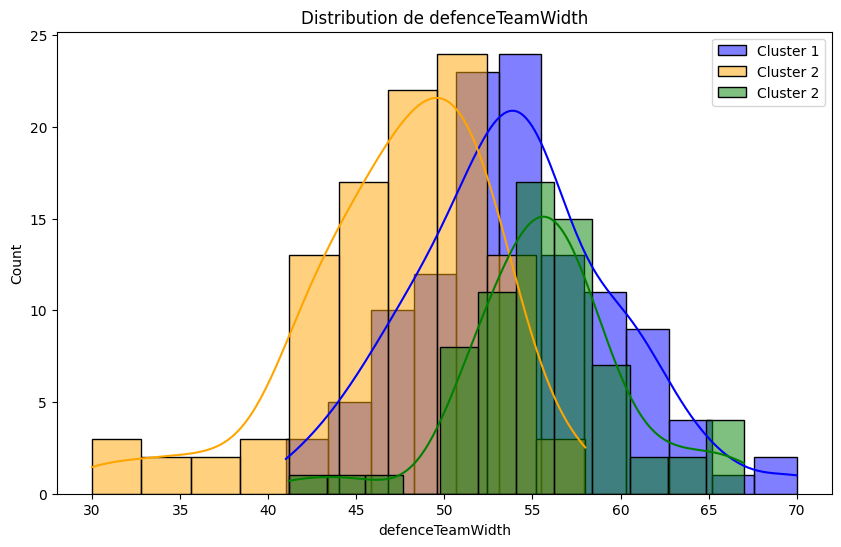

In [ ]:
# Distribution des variables pour chaque cluster
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(original_data[original_data['cluster'] == 1][var], color='blue', kde=True, label="Cluster 1")
    sns.histplot(original_data[original_data['cluster'] == 2][var], color='orange', kde=True, label="Cluster 2")
    sns.histplot(original_data[original_data['cluster'] == 0][var], color='green', kde=True, label="Cluster 2")

    plt.title(f"Distribution de {var}")
    plt.legend()
    plt.show()


In [ ]:
# most_players_goal = table_match_sp.groupby(['player_contribution' , table_match_sp['date'].dt.year])['goals'].sum().reset_index()
# most_players_goal = most_players_goal.sort_values(by='goals' , ascending=False)

In [ ]:
# most_players_ass = table_match_sp.groupby(['player_ass' , table_match_sp['date'].dt.year])['player_contribution'].count().reset_index()
# most_players_ass = most_players_ass.sort_values(by='date' , ascending=False)

In [ ]:
# plt.figure(figsize=(15,5))
# player_con=most_players_goal['player_contribution'].unique()
# for player in player_con[:10] : 
#     player_data=most_players_goal[most_players_goal['player_contribution']==player].sort_values(by='date' , ascending=True)
#     plt.plot(player_data['date'] , player_data['goals'] , marker='o' , label=player)

# plt.legend(title='player Contribution dans season' , bbox_to_anchor=(1,1))

In [ ]:
table_match_sp

,league_id,date,match_api_id,home_team_goal,away_team_goal,home_team,away_team
0,1,2008-08-17,492473,1,1,KRC Genk,Beerschot AC
1,1,2008-08-16,492474,0,0,SV Zulte-Waregem,Sporting Lokeren
2,1,2008-08-16,492475,0,3,KSV Cercle Brugge,RSC Anderlecht
3,1,2008-08-17,492476,5,0,KAA Gent,RAEC Mons
4,1,2008-08-16,492477,1,3,FCV Dender EH,Standard de Liège
...,...,...,...,...,...,...,...
25974,24558,2015-09-22,1992091,1,0,FC St. Gallen,FC Thun
25975,24558,2015-09-23,1992092,1,2,FC Vaduz,FC Luzern
25976,24558,2015-09-23,1992093,2,0,Grasshopper Club Zürich,FC Sion
25977,24558,2015-09-22,1992094,0,0,Lugano,FC Zürich
